### How to visualise the batches and compare it with model predictions

In [1]:
import hydra
from hydra.core.global_hydra import GlobalHydra
import pickle
GlobalHydra.instance().clear()

from omegaconf import DictConfig, OmegaConf
import torch
from torch.utils.data import DataLoader
from src.bfm.src.dataloder import LargeClimateDataset, custom_collate
from src.bfm.src.utils import plot_europe_timesteps_and_difference

In [2]:
hydra.initialize(config_path="", version_base=None)
cfg = hydra.compose(config_name="viz_config")
print(OmegaConf.to_yaml(cfg))

cfg = hydra.compose(config_name="viz_config.yaml", overrides=["data.scaling.enabled=False",
    "data.scaling.stats_path=/home/thanasis.trantas/git_projects/bfm-model/batch_statistics/statistics.json",])


model:
  T: 2
  V_surf: 2
  V_atmos: 2
  C: 3
  V_spec: 1
  V_land: 2
  V_agri: 4
  V_forest: 1
  H: 152
  W: 320
  num_latent_tokens: 8
  backbone: swin
  patch_size: 4
  embed_dim: 512
  num_heads: 16
  head_dim: 64
  depth: 2
data:
  atmos_levels:
  - 50
  - 500
  - 1000
  species_number: 22
  data_path: /home/thanasis.trantas/git_projects/bfm-model/data_small
  test_data_path: /home/thanasis.trantas/git_projects/bfm-model/data_small
  scaling:
    enabled: true
    stats_path: batch_statistics/statistics.json
    mode: normalize
training:
  batch_size: 1
  workers: 15
  epochs: 2
  accelerator: gpu
  precision: bf16-mixed
  precision_in: medium
  devices:
  - 0
  strategy: fsdp
  num_nodes: 1
  gradient_clip: 1.0
  log_steps: 1
  lr: 5.0e-05
  wd: 5.0e-07
  checkpoint_path: false
  eval_every: 2
general:
  do_eval: true
mlflow:
  port: 8082
evaluation:
  checkpoint_path: /home/thanasis.trantas/git_projects/bfm-model/outputs/2025-02-24/12-32-16/checkpoints/epoch=1-step=8.ckpt
  batc

In [3]:
dataset = LargeClimateDataset(data_dir="/home/thanasis.trantas/git_projects/bfm-model/data_small/rollout", scaling_settings=cfg.data.scaling ,num_species=cfg.data.species_number)

viz_dataloader = DataLoader(
    dataset,
    batch_size=1,
    num_workers=15,
    collate_fn=custom_collate,
    drop_last=True,
    shuffle=False,
)

len(viz_dataloader)

# sample = next(iter(viz_dataloader))
# sample

# Load the rollout dictionary for visualisation 
# with open("rollouts.pkl", 'rb') as f:
#     sample_dict = pickle.load(f)


We scale the dataset False with normalize


1

In [4]:
groups = [
    "surface_variables",
    "single_variables",
    "atmospheric_variables",
    "species_extinction_variables",
    "land_variables",
    "agriculture_variables",
    "forest_variables",
    "species_variables",
]

# for i, batch_dict in enumerate(sample_dict["batches"]):
# Iterate through the dataloder = 1 sample
for sample in viz_dataloader:
    for group_name in groups:

        # pred_dict = sample[group_name]
        true_dict = getattr(sample, group_name)
        for var_name, pred_tensor in true_dict.items():
            sample_tensor = true_dict[var_name]
            print(group_name)
            print(var_name)
            print(sample_tensor.shape)

    # Now, also access the metadata:
    if hasattr(sample, "batch_metadata"):
        metadata = sample.batch_metadata
        print("Batch Metadata:")
        # If metadata is a namedtuple (has _fields), iterate over its fields.
        if hasattr(metadata, "_fields"):
            for field in metadata._fields:
                value = getattr(metadata, field)
                if isinstance(value, torch.Tensor):
                    print(f"  {field}: shape = {value.shape}")
                else:
                    print(f"  {field}: {value}")
        else:
            print(metadata)

surface_variables
t2m
torch.Size([1, 2, 152, 320])
surface_variables
msl
torch.Size([1, 2, 152, 320])
single_variables
lsm
torch.Size([1, 2, 152, 320])
atmospheric_variables
z
torch.Size([1, 2, 3, 152, 320])
atmospheric_variables
t
torch.Size([1, 2, 3, 152, 320])
species_extinction_variables
ExtinctionValue
torch.Size([1, 2, 152, 320])
land_variables
NDVI
torch.Size([1, 2, 152, 320])
land_variables
Land
torch.Size([1, 2, 152, 320])
agriculture_variables
AgricultureLand
torch.Size([1, 2, 152, 320])
agriculture_variables
AgricultureIrrLand
torch.Size([1, 2, 152, 320])
agriculture_variables
ArableLand
torch.Size([1, 2, 152, 320])
agriculture_variables
Cropland
torch.Size([1, 2, 152, 320])
forest_variables
Forest
torch.Size([1, 2, 152, 320])
species_variables
Distribution
torch.Size([1, 2, 22, 152, 320])
Batch Metadata:
  latitudes: shape = torch.Size([152])
  longitudes: shape = torch.Size([320])
  timestamp: ['2020-05-29T18:00:00', '2020-05-30T00:00:00']
  lead_time: 6.0
  pressure_level

Plotting surface_variables:t2m with shape torch.Size([1, 2, 152, 320])


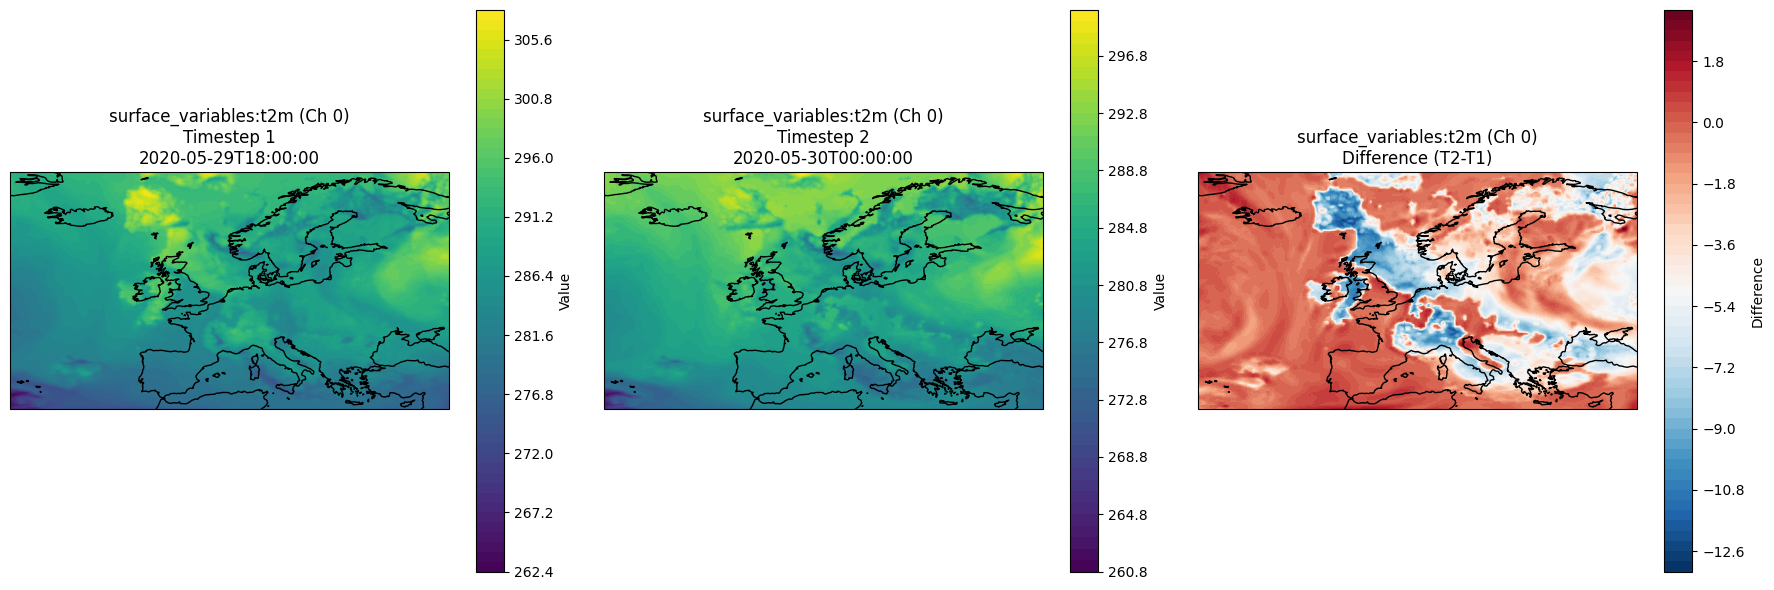

Saved plot: ./plots/surface_variables:t2m_ch0_t0_2020-05-29T18:00:00_t1_2020-05-30T00:00:00.jpeg
Plotting surface_variables:msl with shape torch.Size([1, 2, 152, 320])


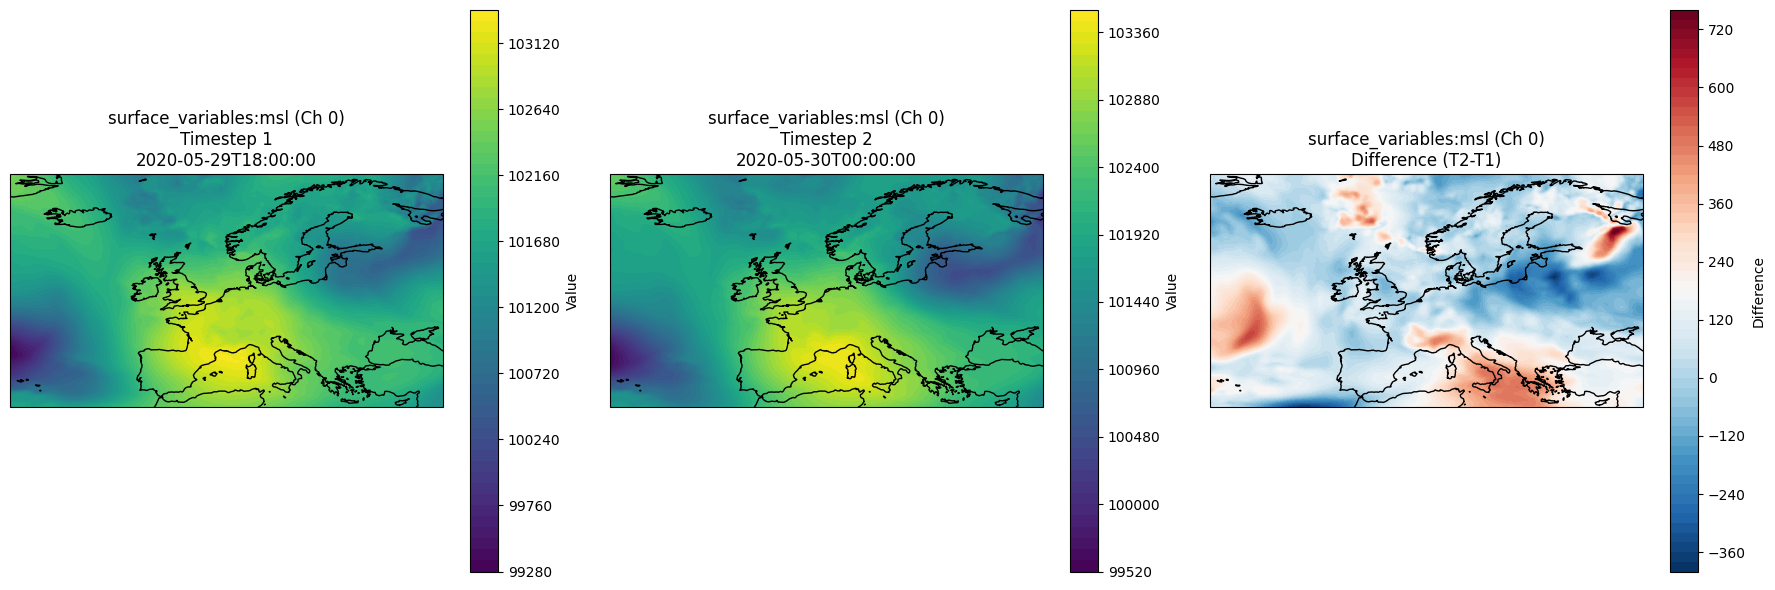

Saved plot: ./plots/surface_variables:msl_ch0_t0_2020-05-29T18:00:00_t1_2020-05-30T00:00:00.jpeg
Plotting single_variables:lsm with shape torch.Size([1, 2, 152, 320])


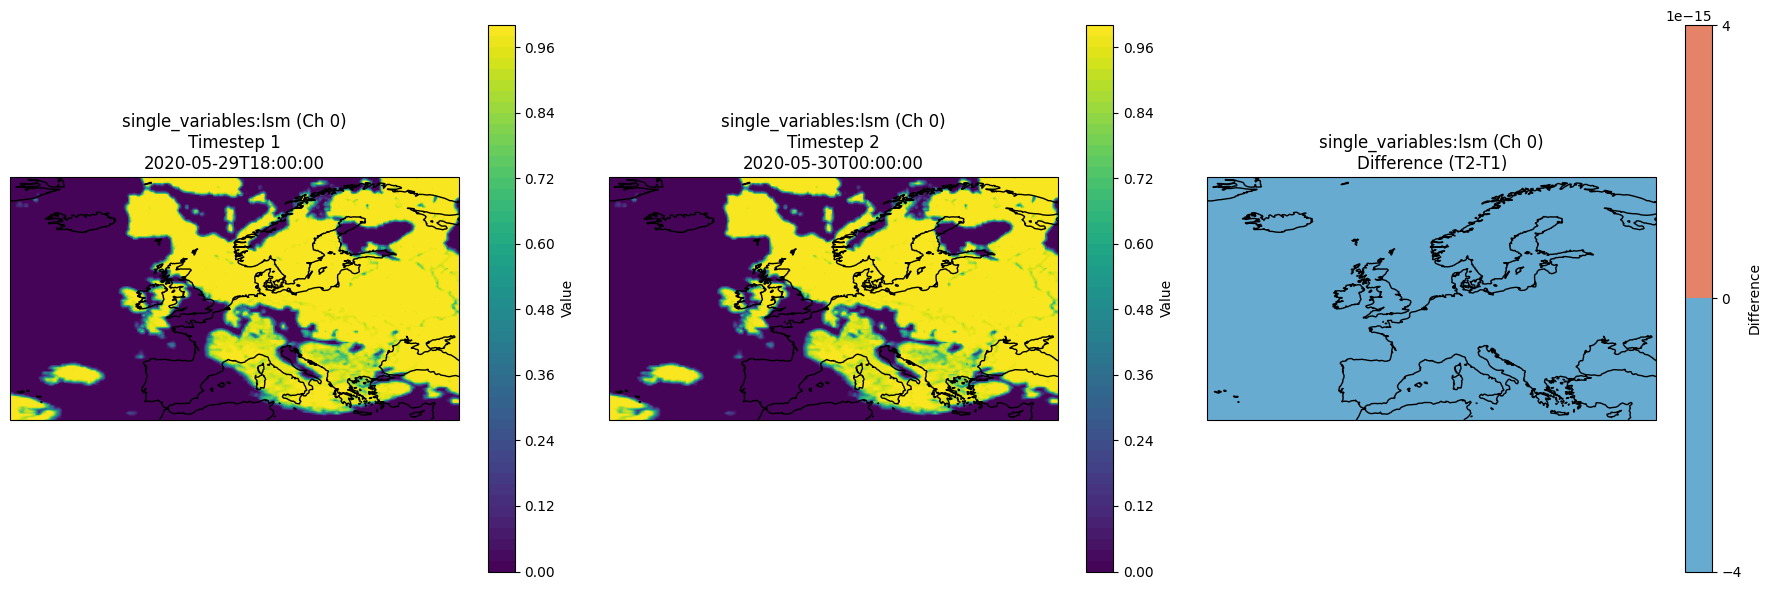

Saved plot: ./plots/single_variables:lsm_ch0_t0_2020-05-29T18:00:00_t1_2020-05-30T00:00:00.jpeg
Plotting atmospheric_variables:z with shape torch.Size([1, 2, 3, 152, 320])


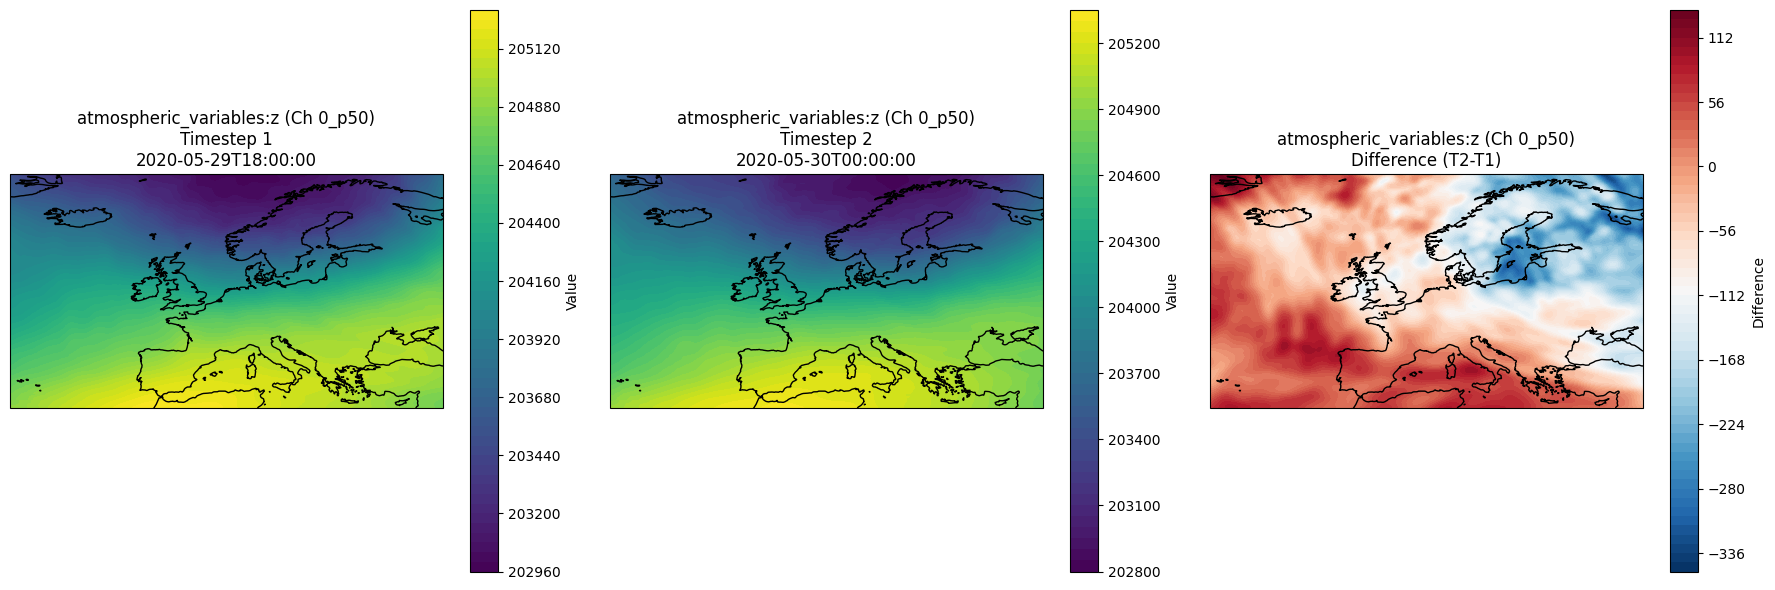

Saved plot: ./plots/atmospheric_variables:z_ch0_p50_t0_2020-05-29T18:00:00_t1_2020-05-30T00:00:00.jpeg


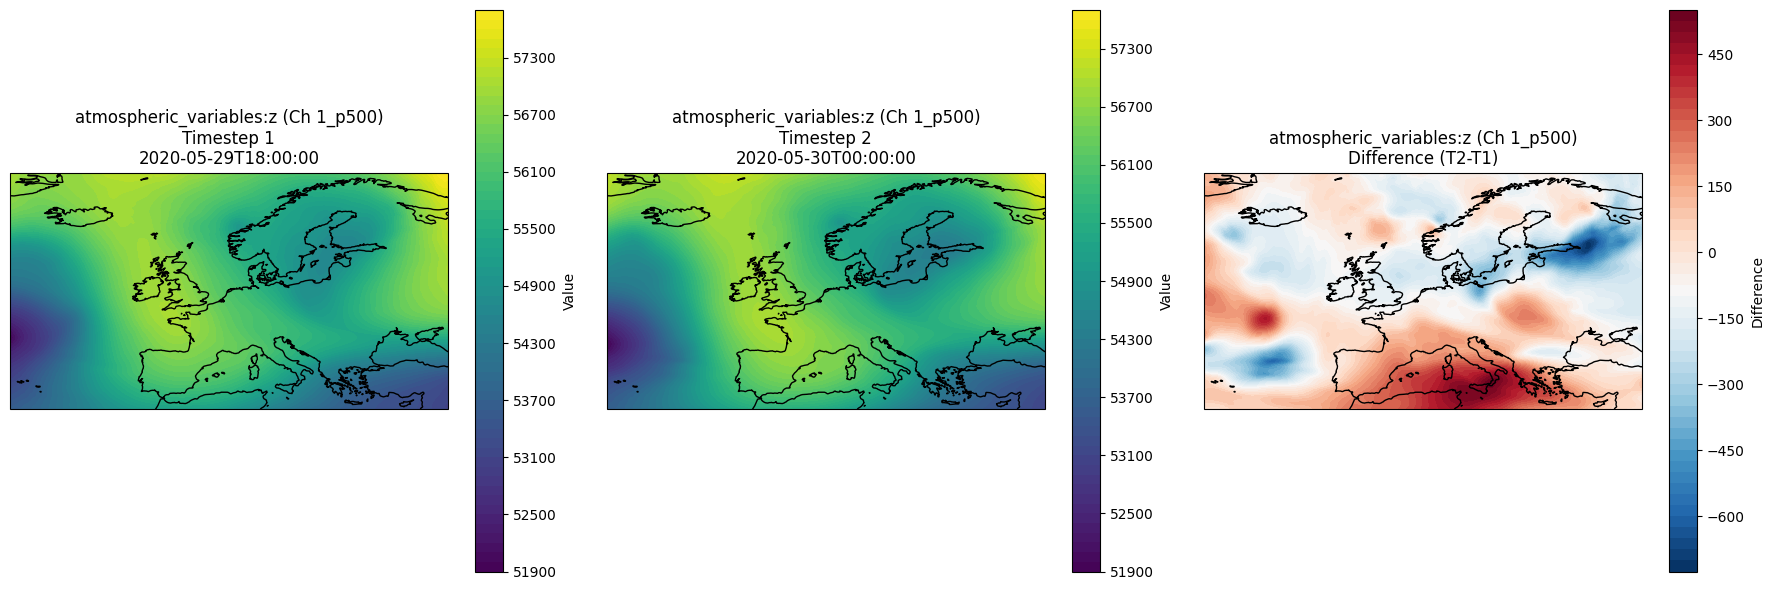

Saved plot: ./plots/atmospheric_variables:z_ch1_p500_t0_2020-05-29T18:00:00_t1_2020-05-30T00:00:00.jpeg


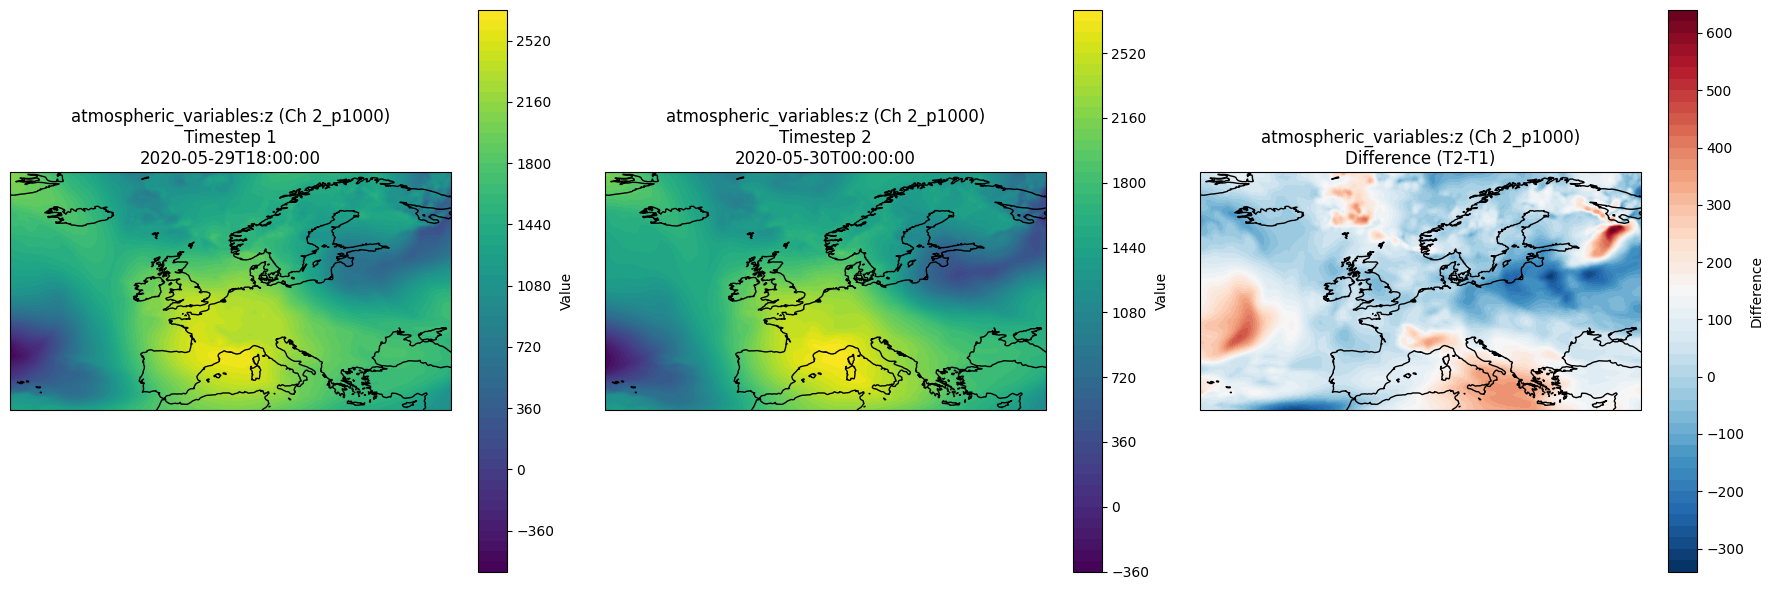

Saved plot: ./plots/atmospheric_variables:z_ch2_p1000_t0_2020-05-29T18:00:00_t1_2020-05-30T00:00:00.jpeg
Plotting atmospheric_variables:t with shape torch.Size([1, 2, 3, 152, 320])


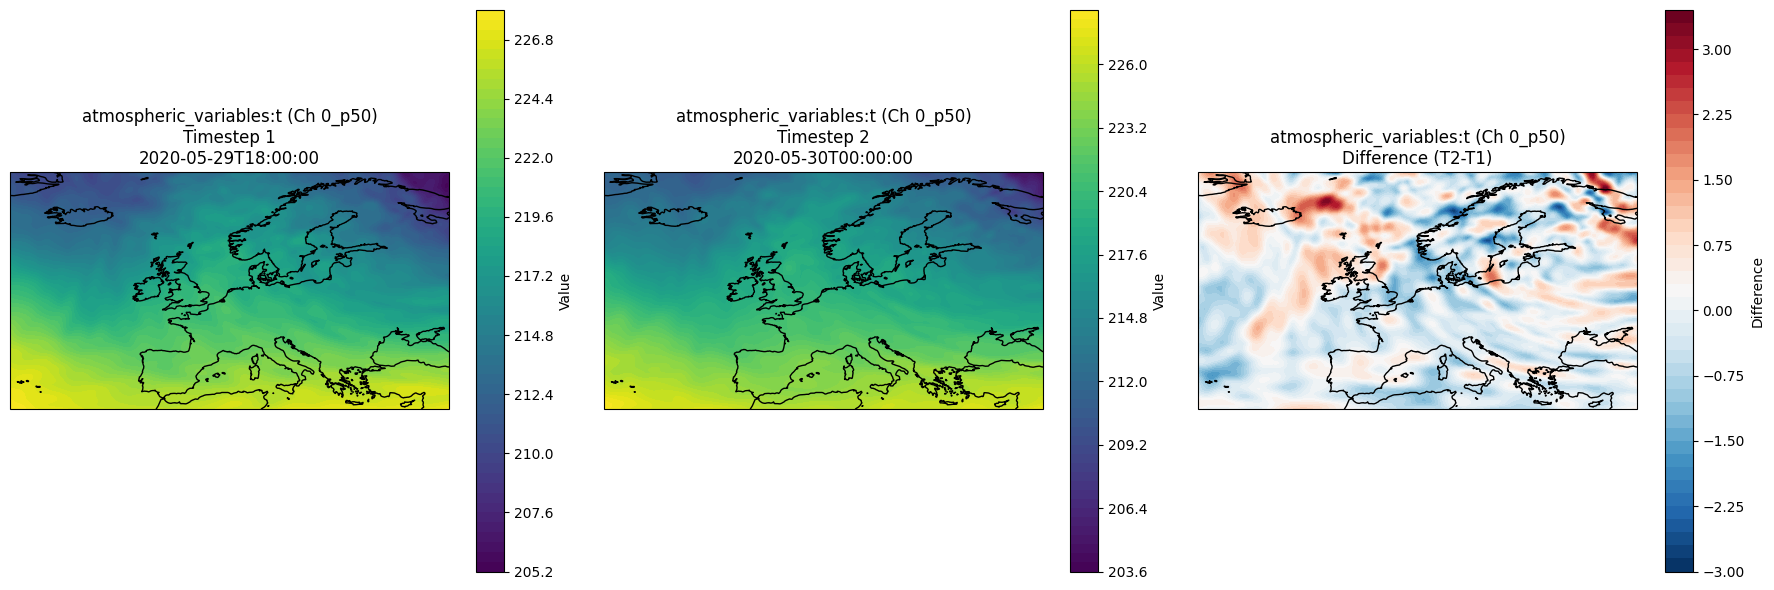

Saved plot: ./plots/atmospheric_variables:t_ch0_p50_t0_2020-05-29T18:00:00_t1_2020-05-30T00:00:00.jpeg


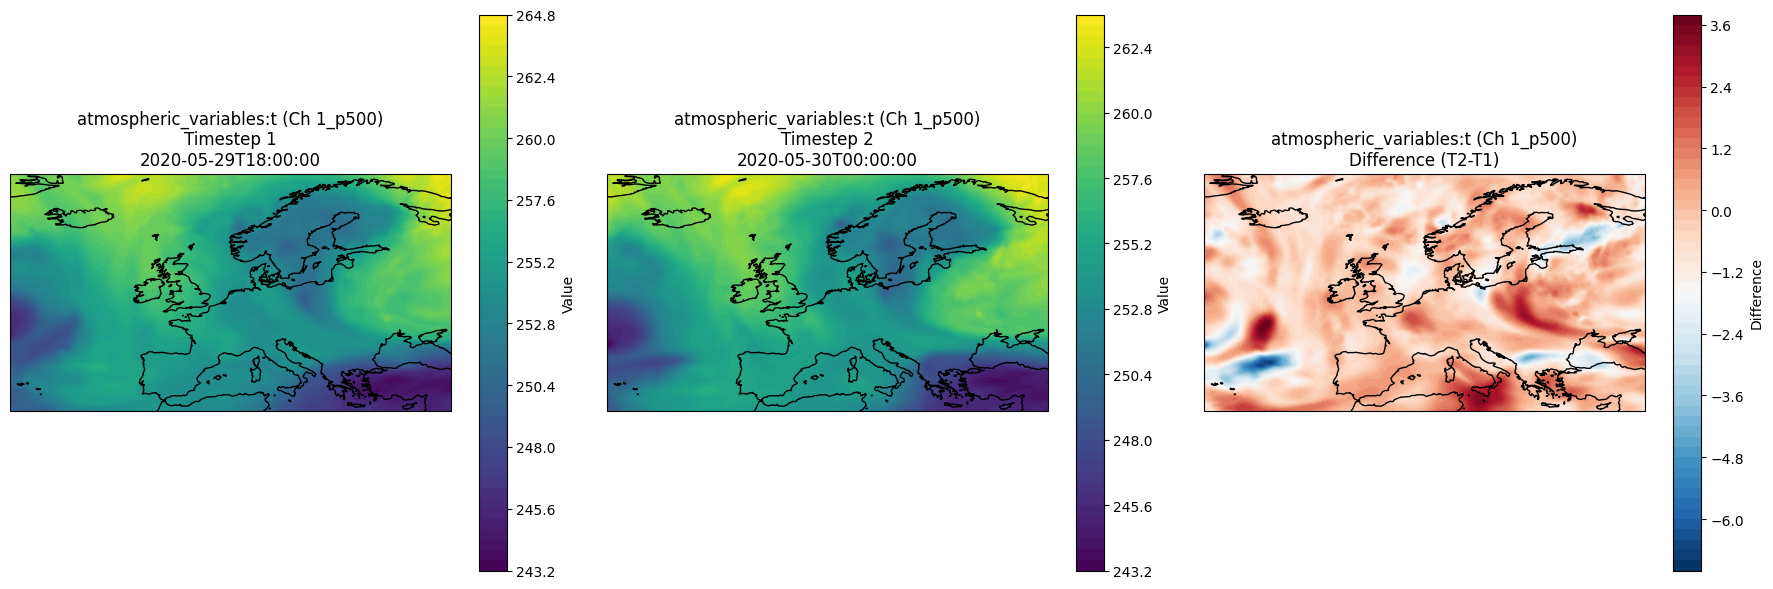

Saved plot: ./plots/atmospheric_variables:t_ch1_p500_t0_2020-05-29T18:00:00_t1_2020-05-30T00:00:00.jpeg


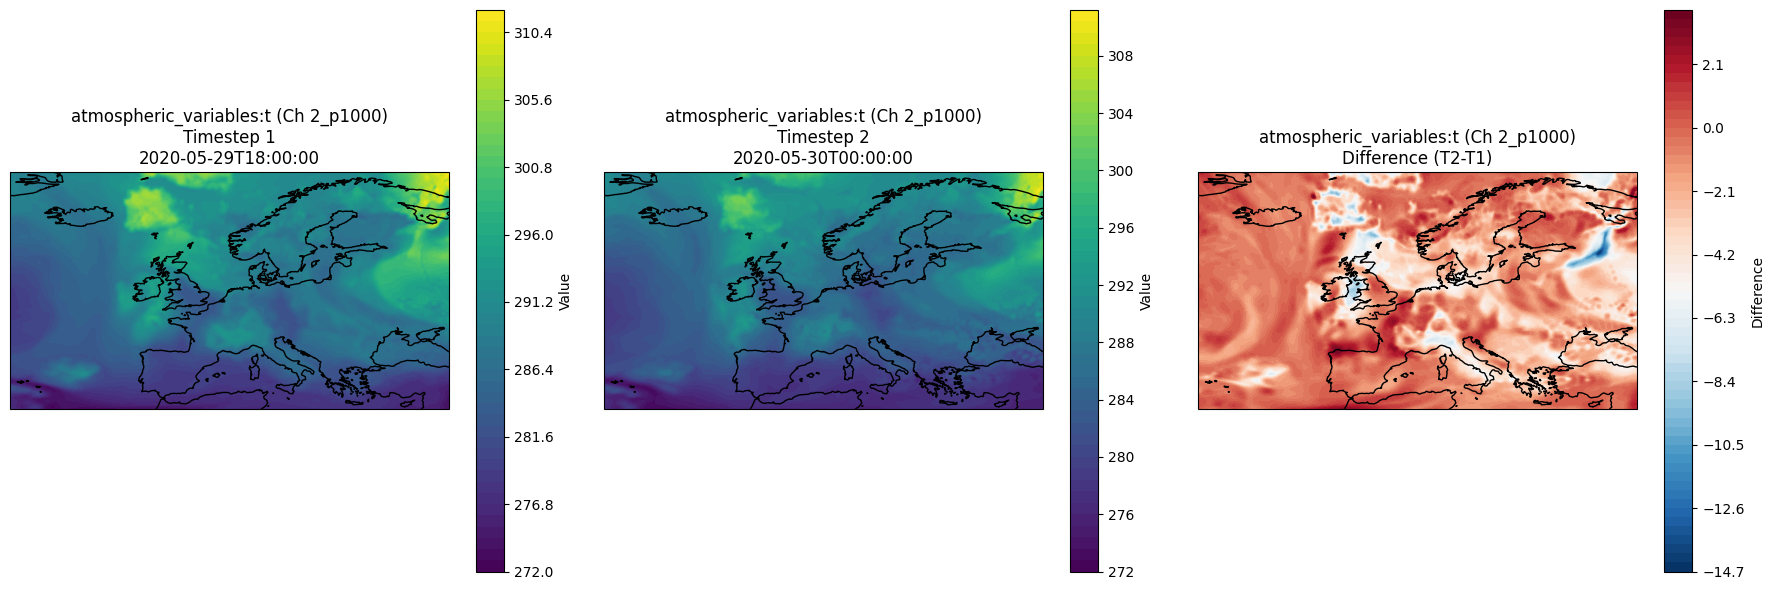

Saved plot: ./plots/atmospheric_variables:t_ch2_p1000_t0_2020-05-29T18:00:00_t1_2020-05-30T00:00:00.jpeg
Plotting species_extinction_variables:ExtinctionValue with shape torch.Size([1, 2, 152, 320])


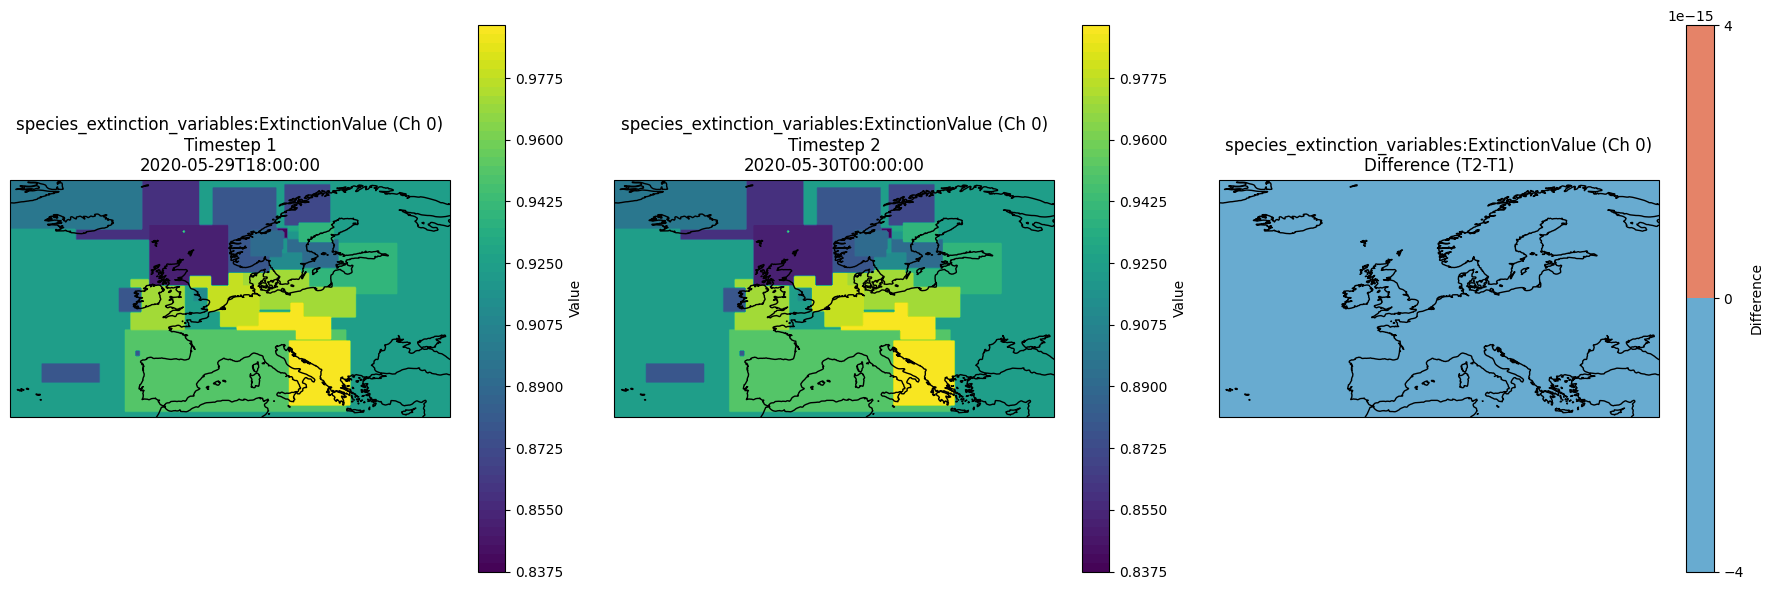

Saved plot: ./plots/species_extinction_variables:ExtinctionValue_ch0_t0_2020-05-29T18:00:00_t1_2020-05-30T00:00:00.jpeg
Plotting land_variables:NDVI with shape torch.Size([1, 2, 152, 320])


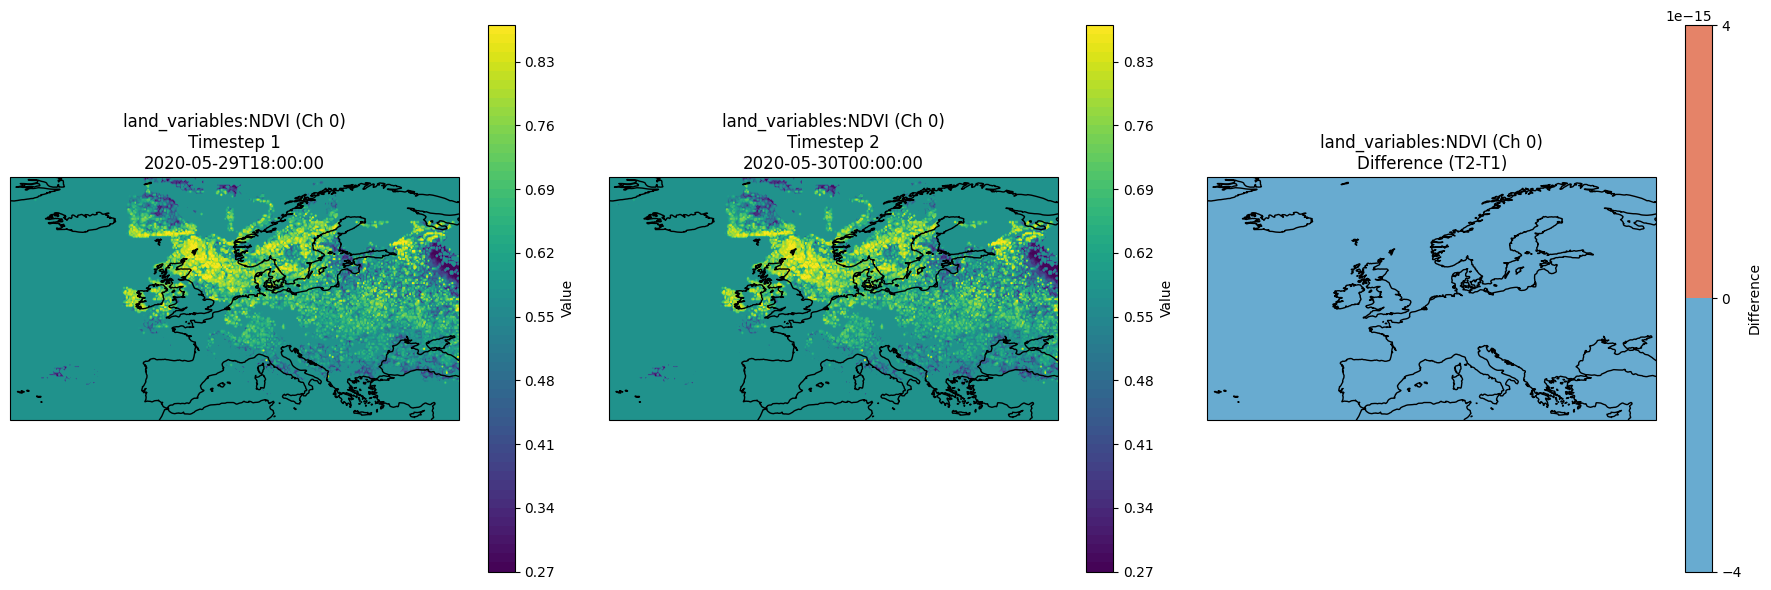

Saved plot: ./plots/land_variables:NDVI_ch0_t0_2020-05-29T18:00:00_t1_2020-05-30T00:00:00.jpeg
Plotting land_variables:Land with shape torch.Size([1, 2, 152, 320])


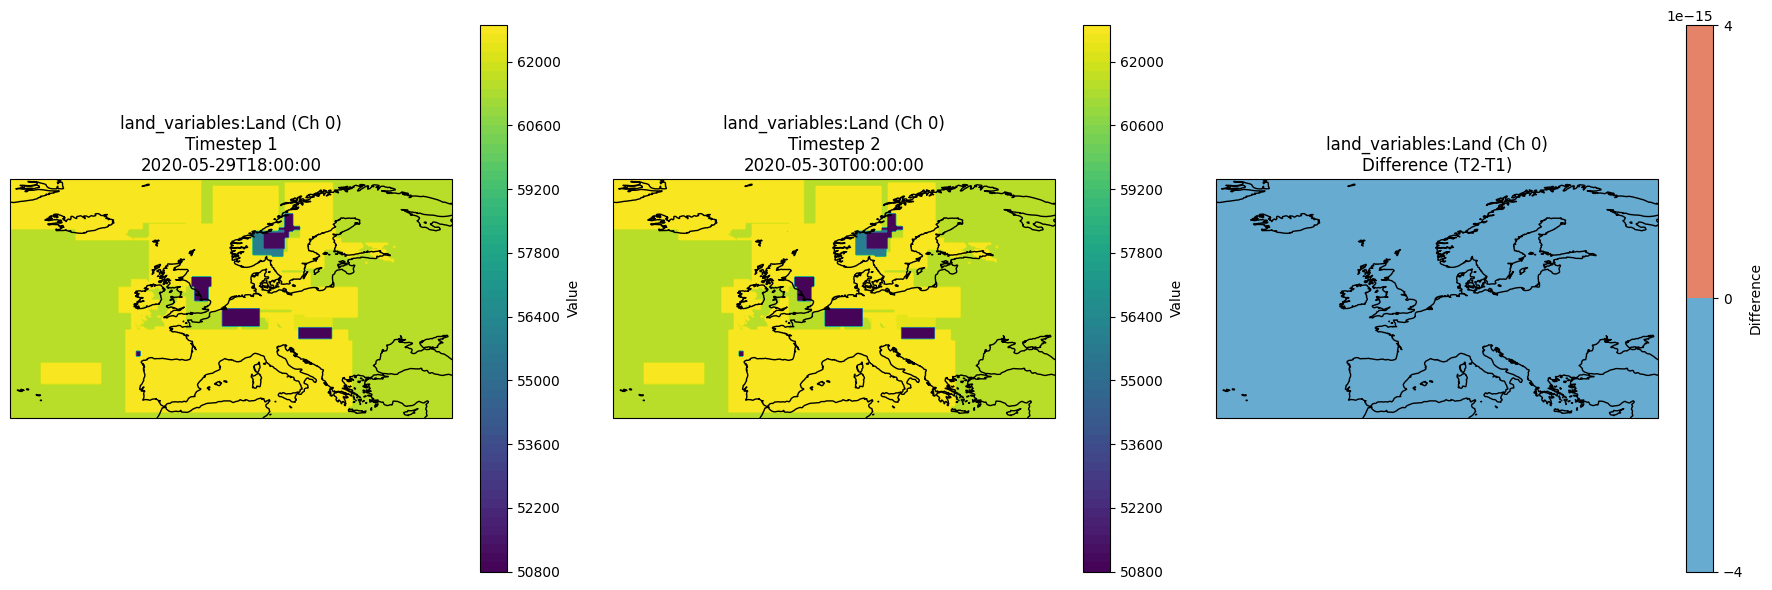

Saved plot: ./plots/land_variables:Land_ch0_t0_2020-05-29T18:00:00_t1_2020-05-30T00:00:00.jpeg
Plotting agriculture_variables:AgricultureLand with shape torch.Size([1, 2, 152, 320])


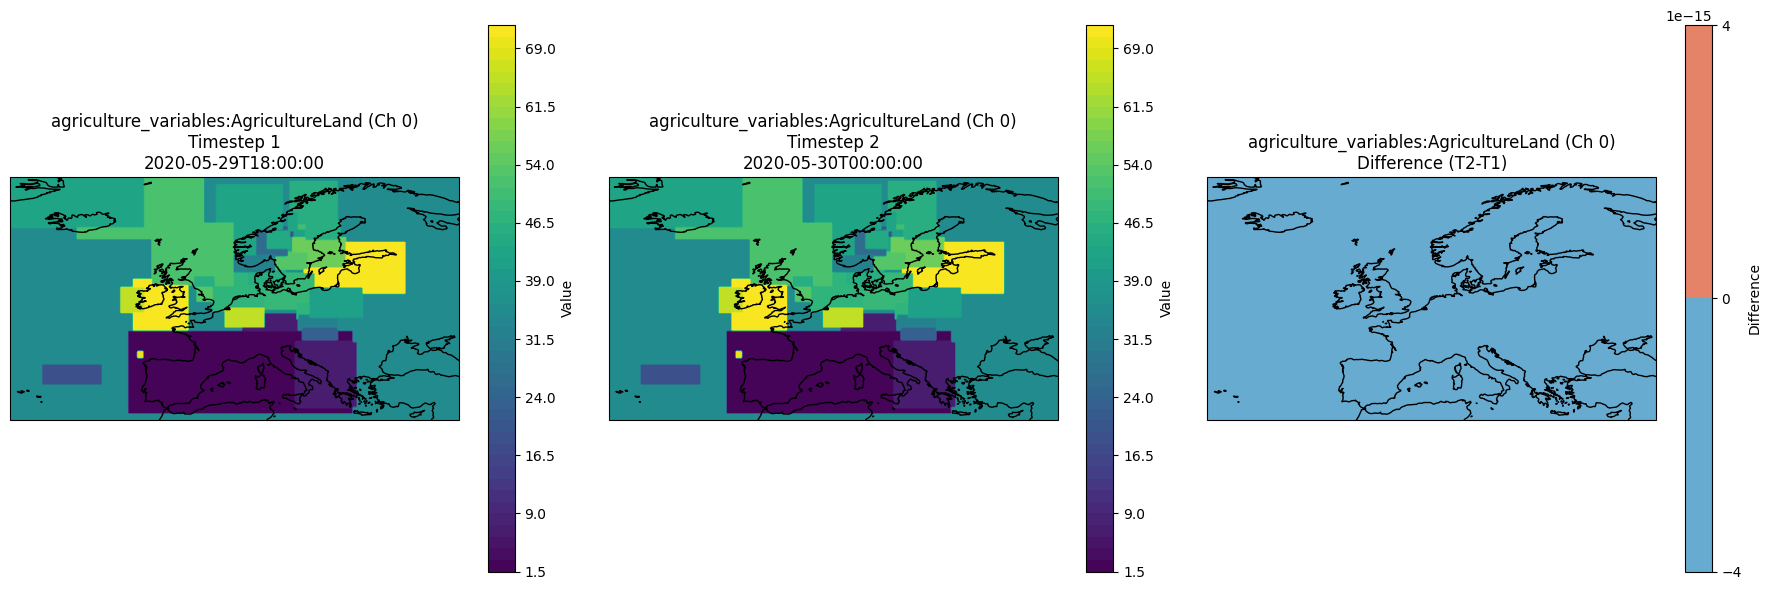

Saved plot: ./plots/agriculture_variables:AgricultureLand_ch0_t0_2020-05-29T18:00:00_t1_2020-05-30T00:00:00.jpeg
Plotting agriculture_variables:AgricultureIrrLand with shape torch.Size([1, 2, 152, 320])


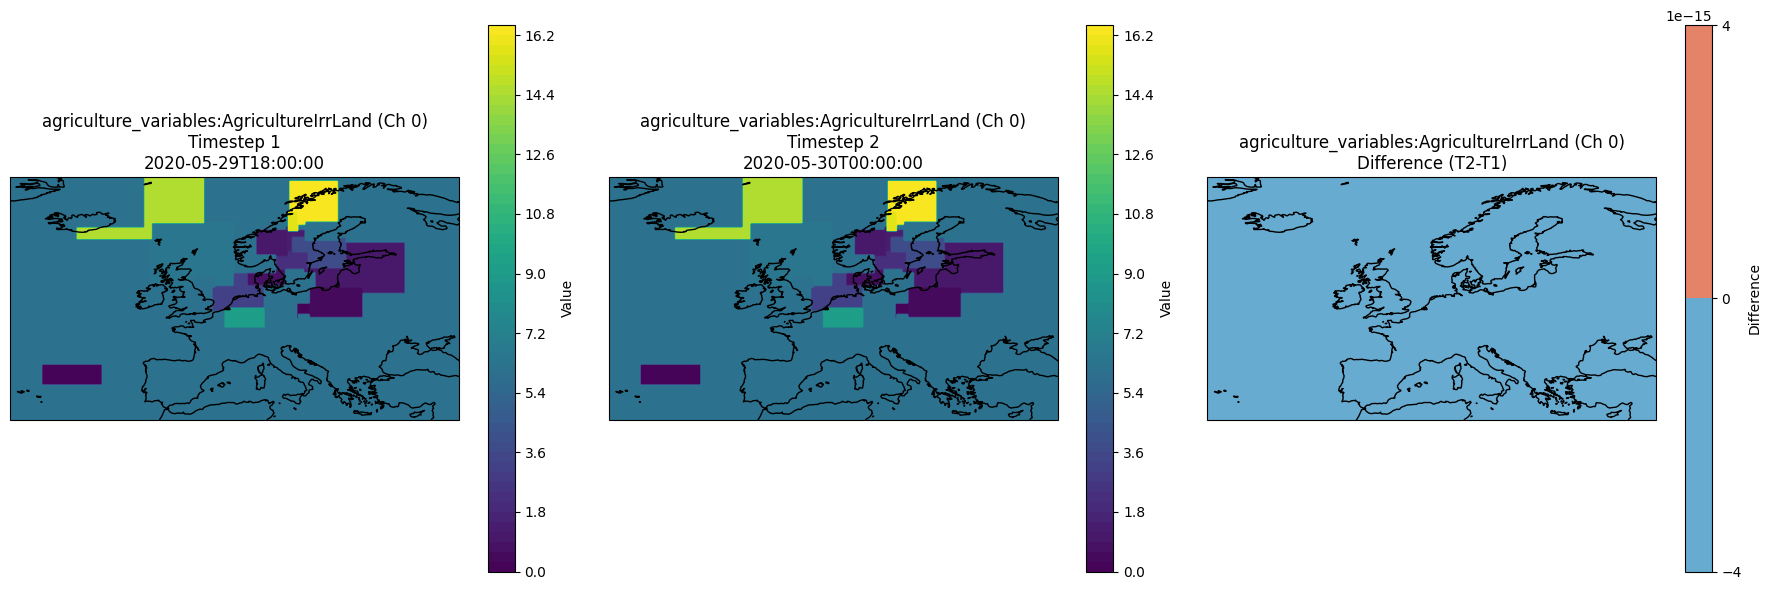

Saved plot: ./plots/agriculture_variables:AgricultureIrrLand_ch0_t0_2020-05-29T18:00:00_t1_2020-05-30T00:00:00.jpeg
Plotting agriculture_variables:ArableLand with shape torch.Size([1, 2, 152, 320])


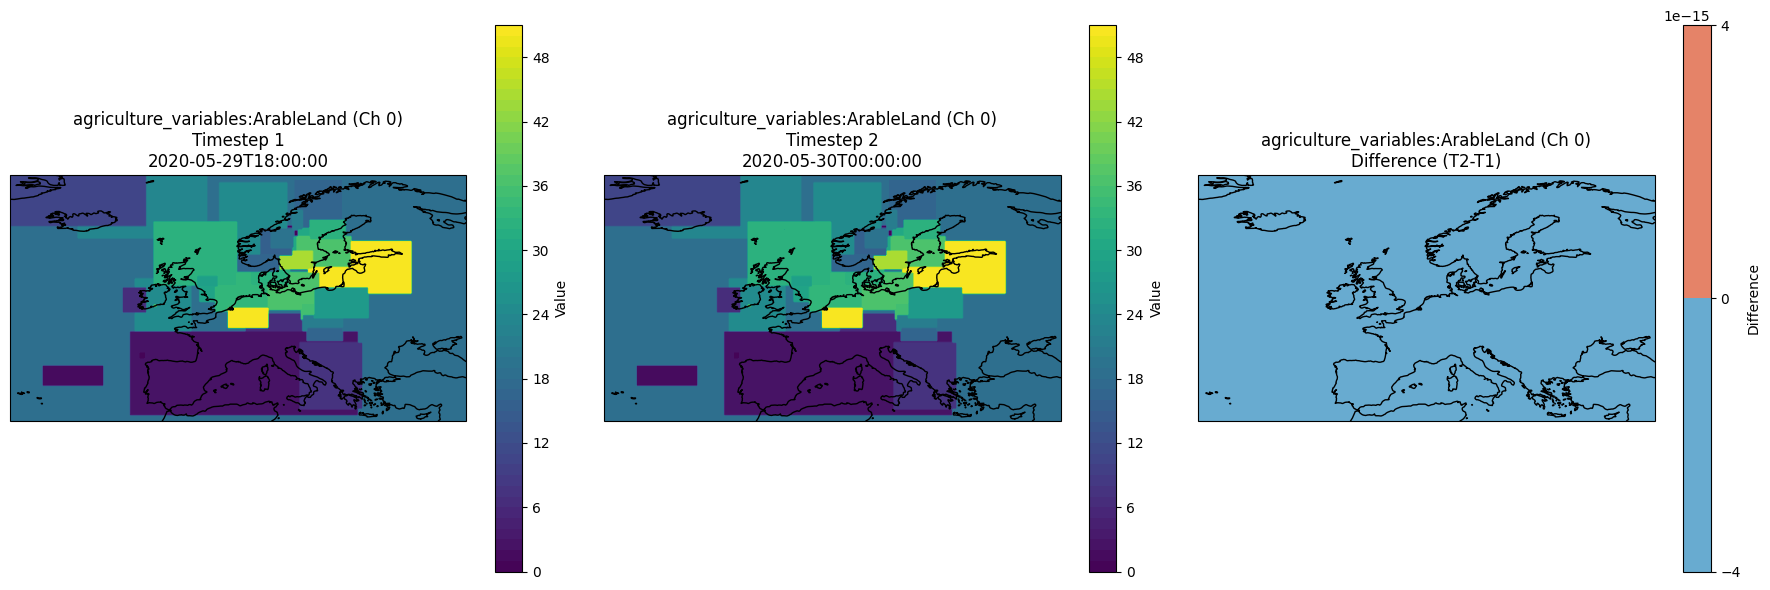

Saved plot: ./plots/agriculture_variables:ArableLand_ch0_t0_2020-05-29T18:00:00_t1_2020-05-30T00:00:00.jpeg
Plotting agriculture_variables:Cropland with shape torch.Size([1, 2, 152, 320])


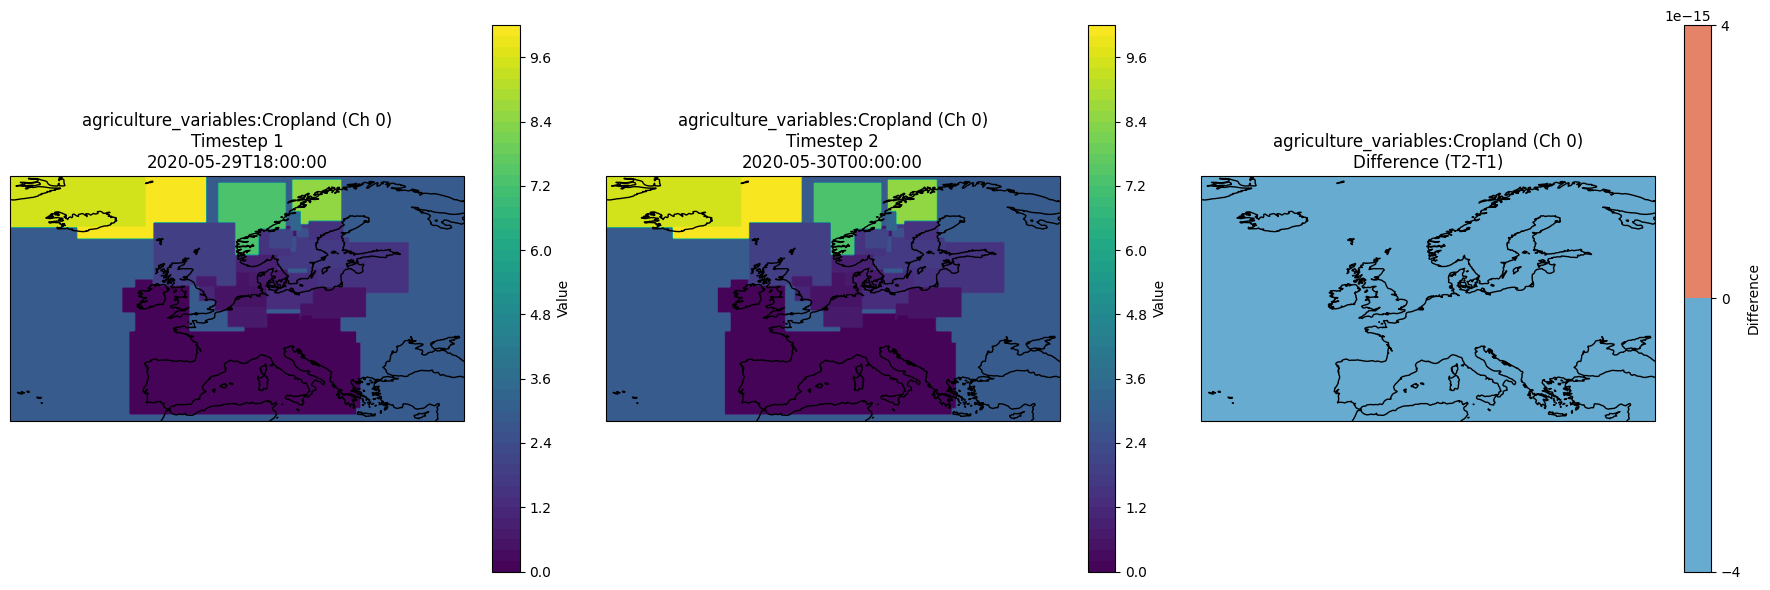

Saved plot: ./plots/agriculture_variables:Cropland_ch0_t0_2020-05-29T18:00:00_t1_2020-05-30T00:00:00.jpeg
Plotting forest_variables:Forest with shape torch.Size([1, 2, 152, 320])


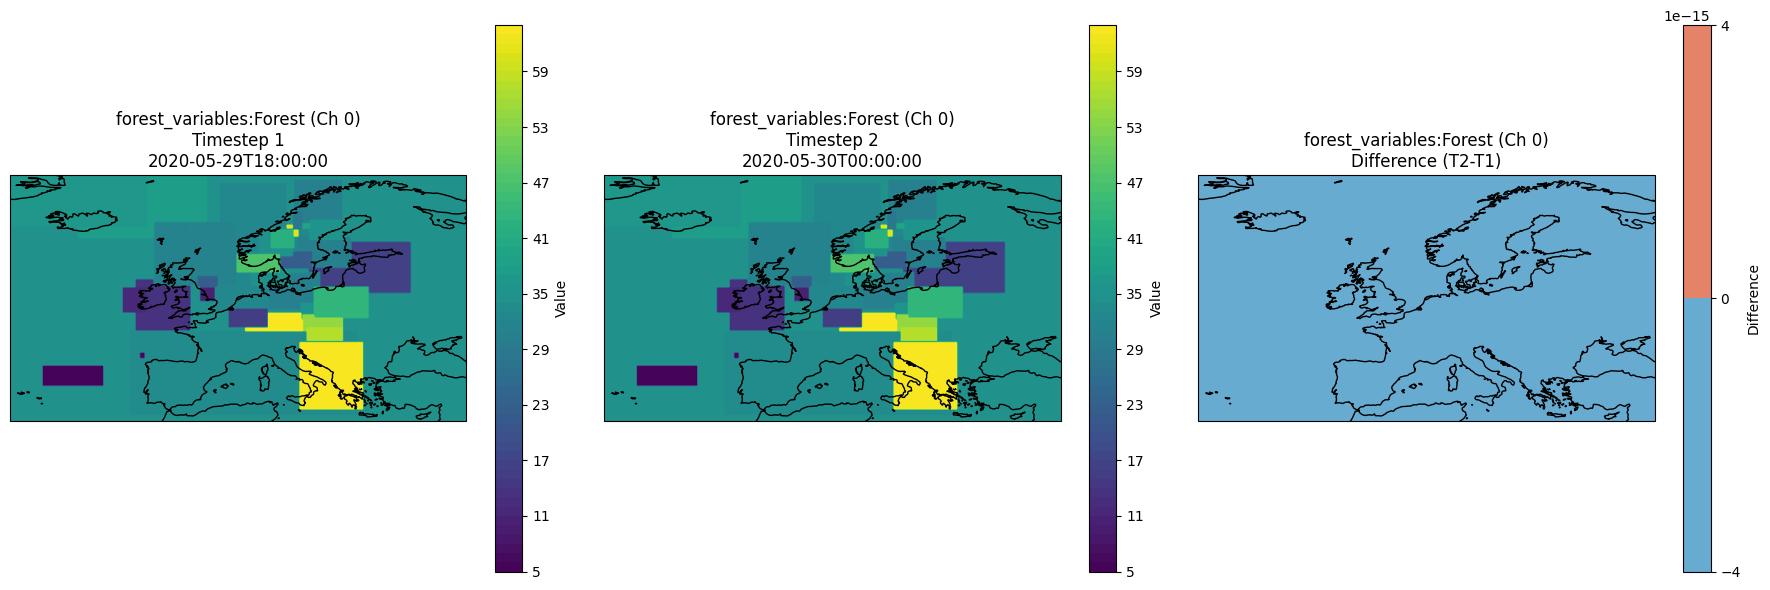

Saved plot: ./plots/forest_variables:Forest_ch0_t0_2020-05-29T18:00:00_t1_2020-05-30T00:00:00.jpeg
Plotting species_variables:Distribution with shape torch.Size([1, 2, 22, 152, 320])


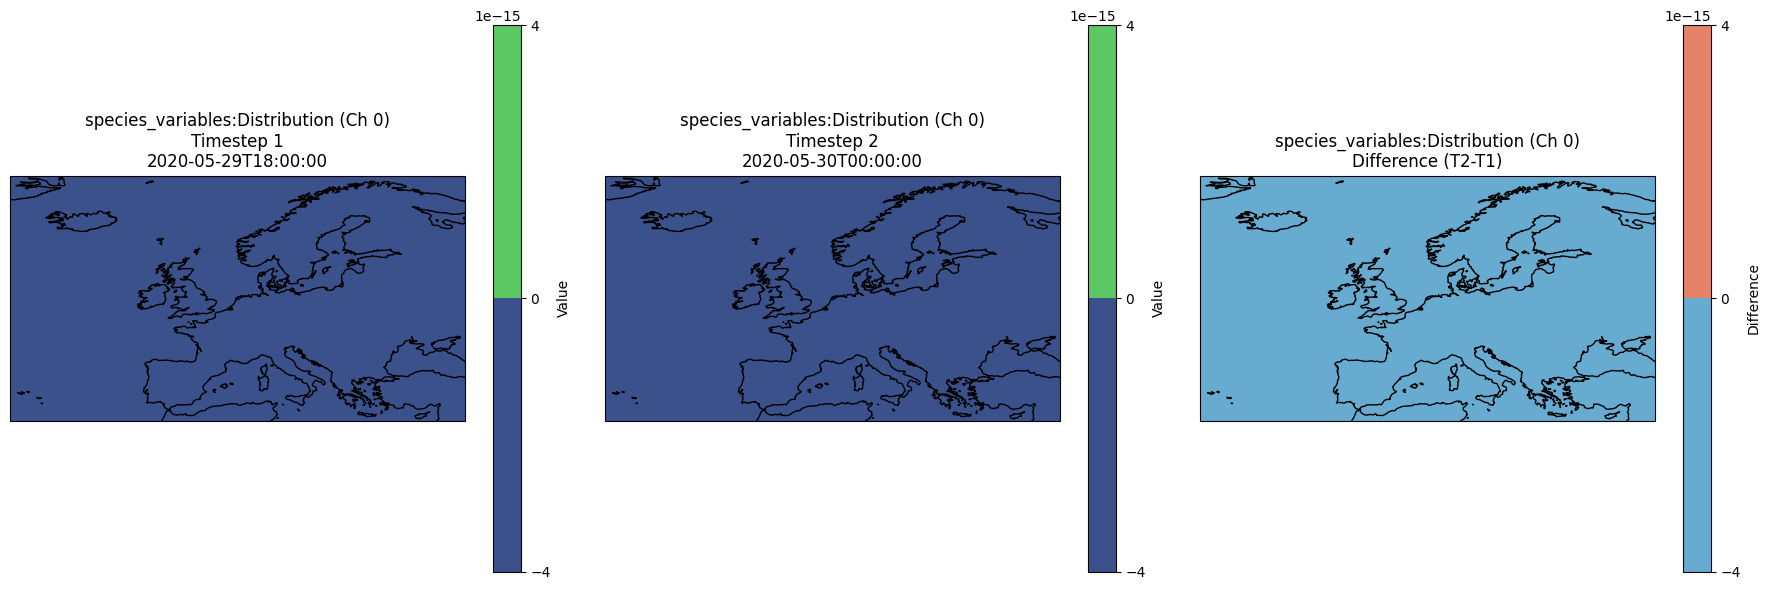

Saved plot: ./plots/species_variables:Distribution_ch0_t0_2020-05-29T18:00:00_t1_2020-05-30T00:00:00.jpeg


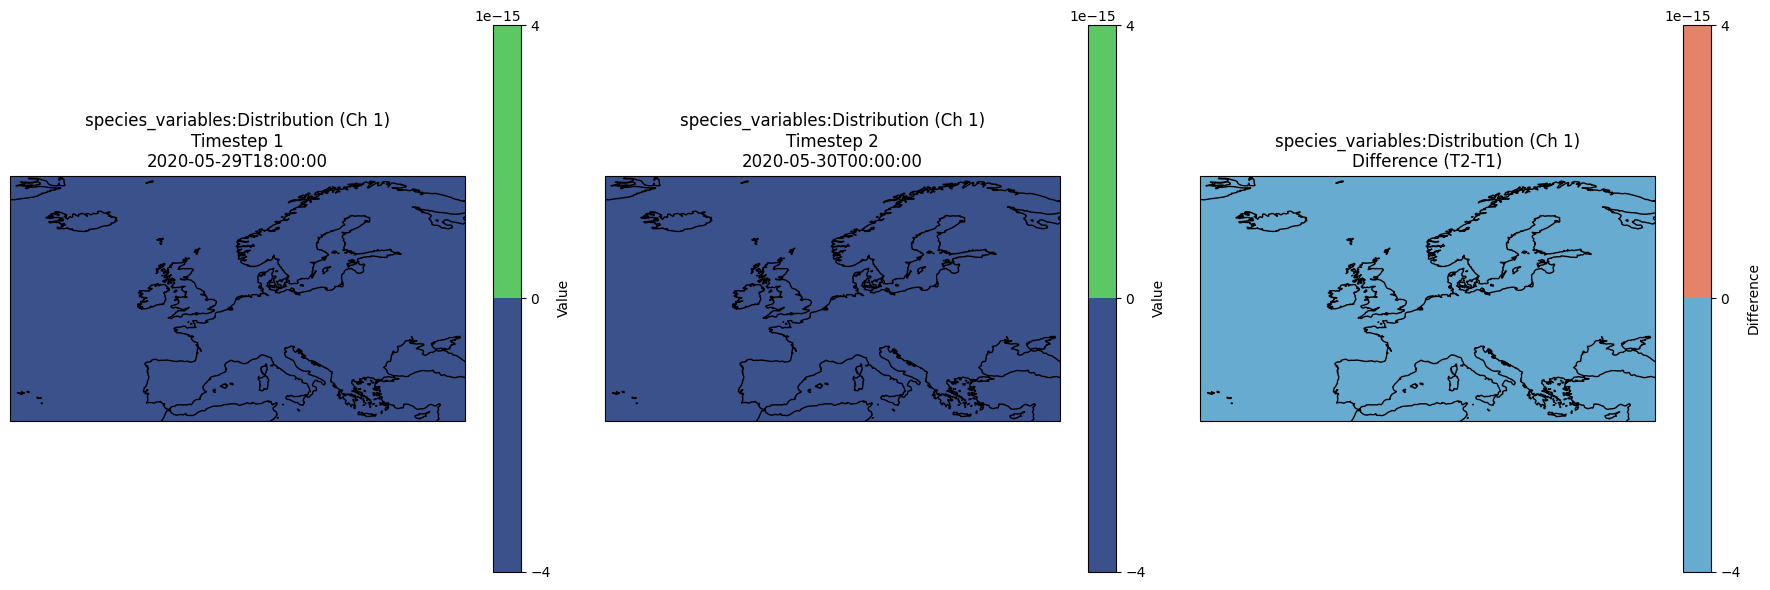

Saved plot: ./plots/species_variables:Distribution_ch1_t0_2020-05-29T18:00:00_t1_2020-05-30T00:00:00.jpeg


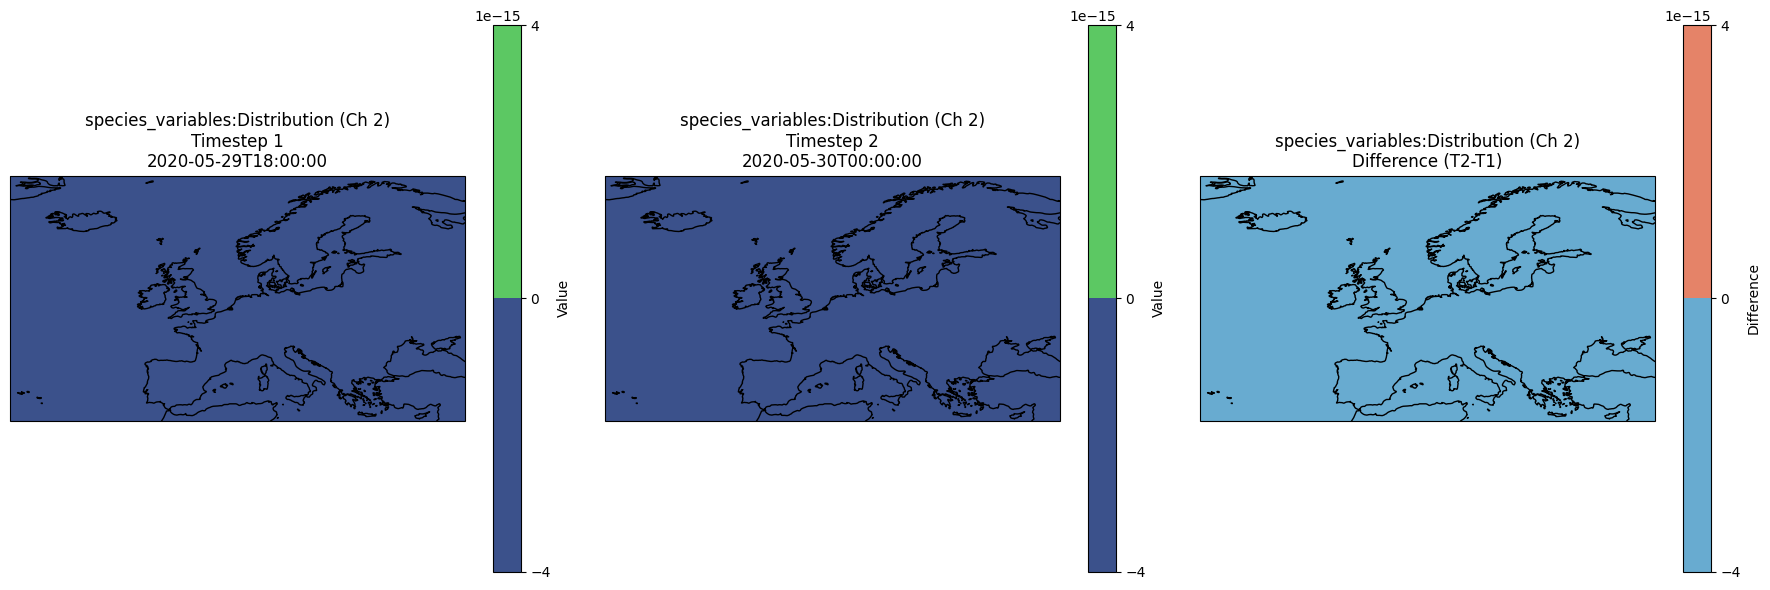

Saved plot: ./plots/species_variables:Distribution_ch2_t0_2020-05-29T18:00:00_t1_2020-05-30T00:00:00.jpeg


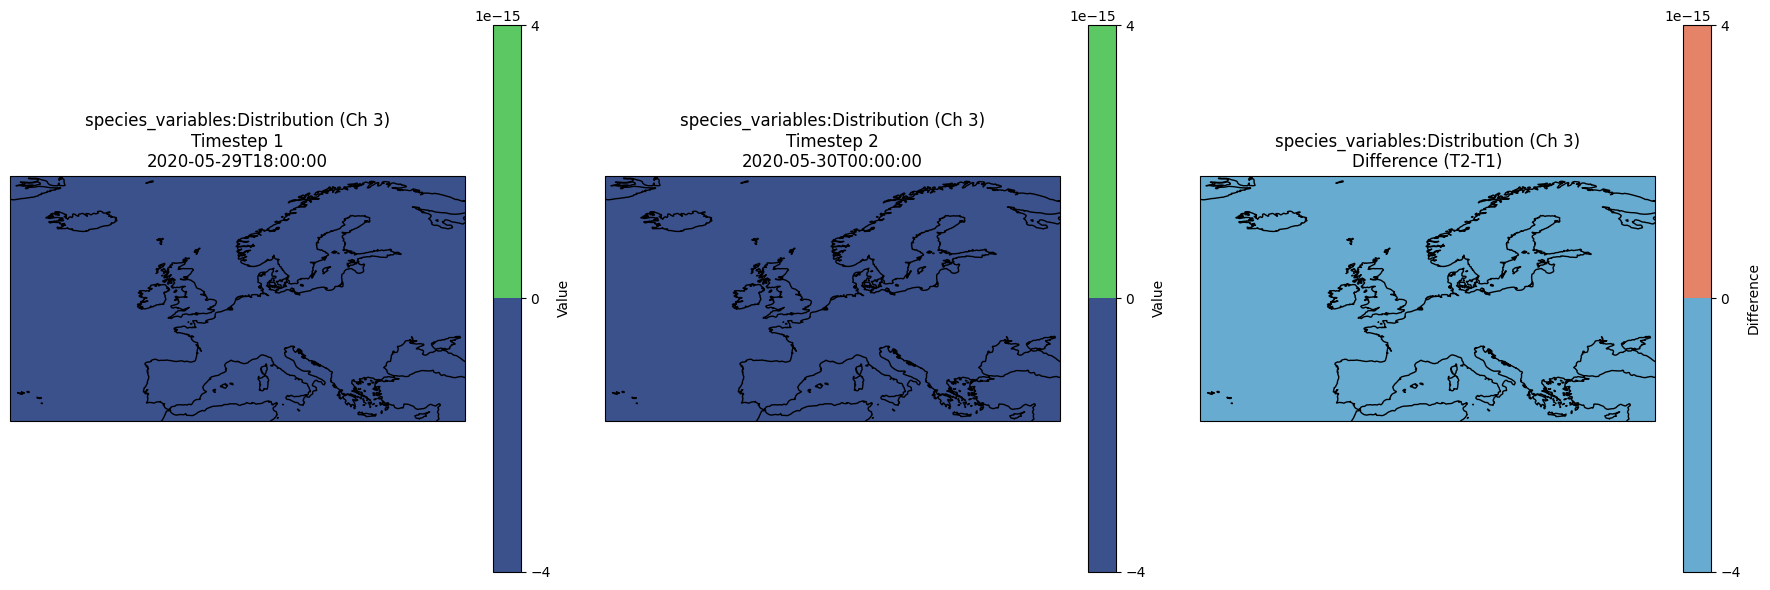

Saved plot: ./plots/species_variables:Distribution_ch3_t0_2020-05-29T18:00:00_t1_2020-05-30T00:00:00.jpeg


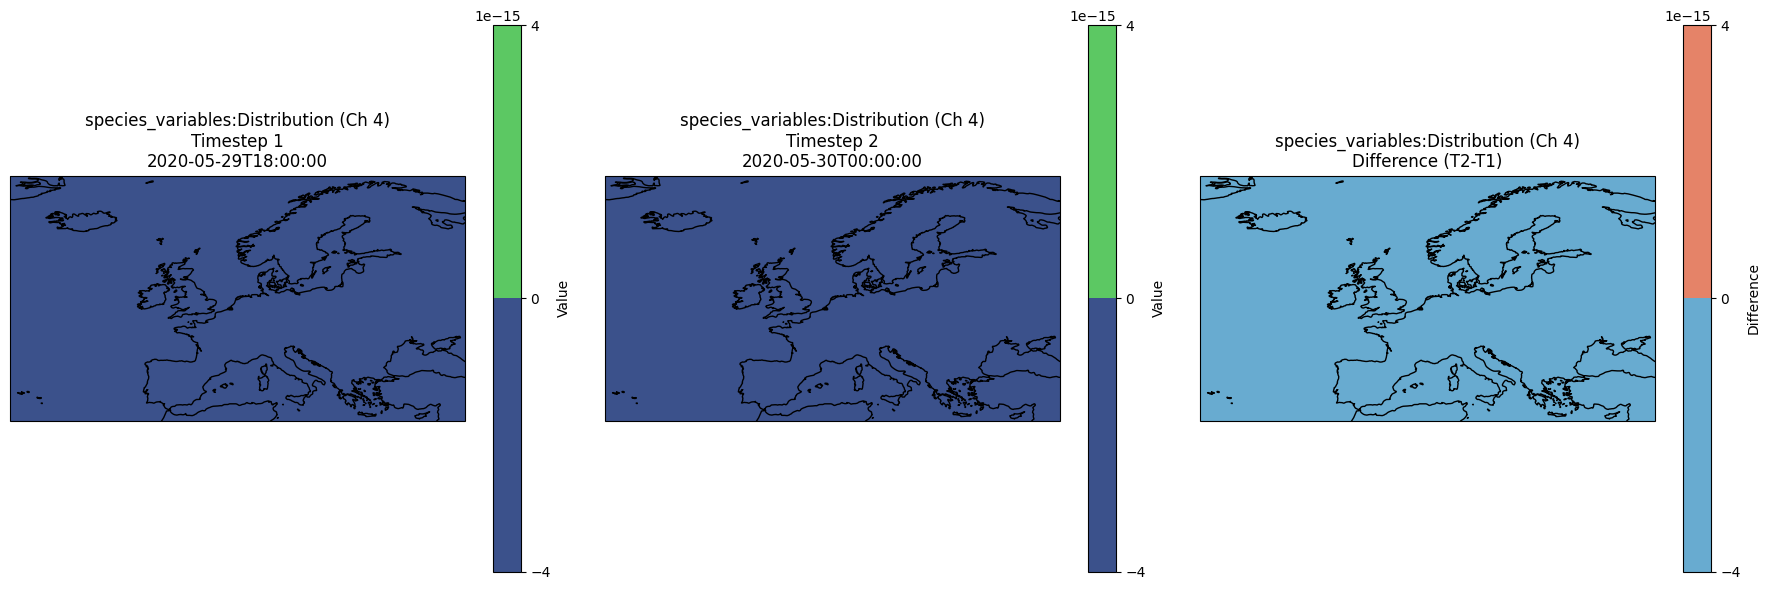

Saved plot: ./plots/species_variables:Distribution_ch4_t0_2020-05-29T18:00:00_t1_2020-05-30T00:00:00.jpeg


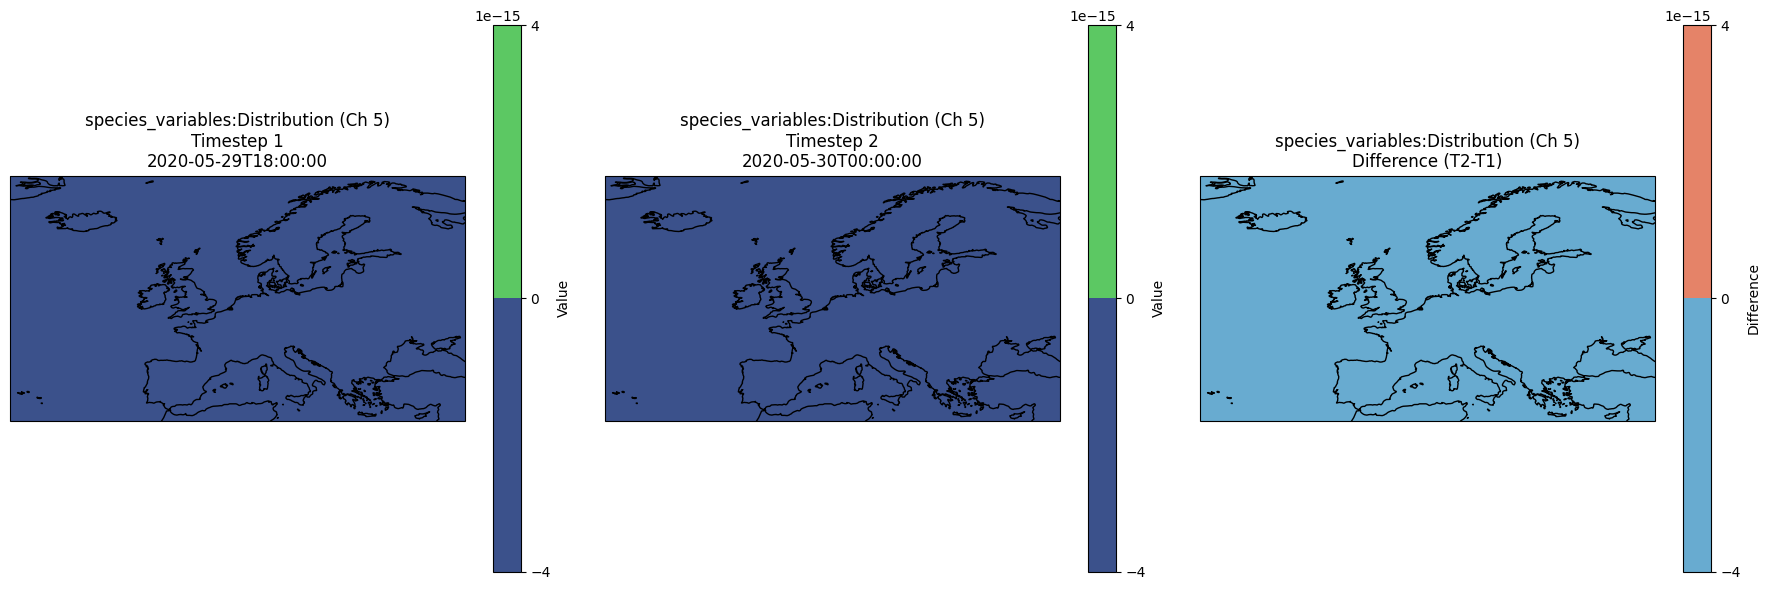

Saved plot: ./plots/species_variables:Distribution_ch5_t0_2020-05-29T18:00:00_t1_2020-05-30T00:00:00.jpeg


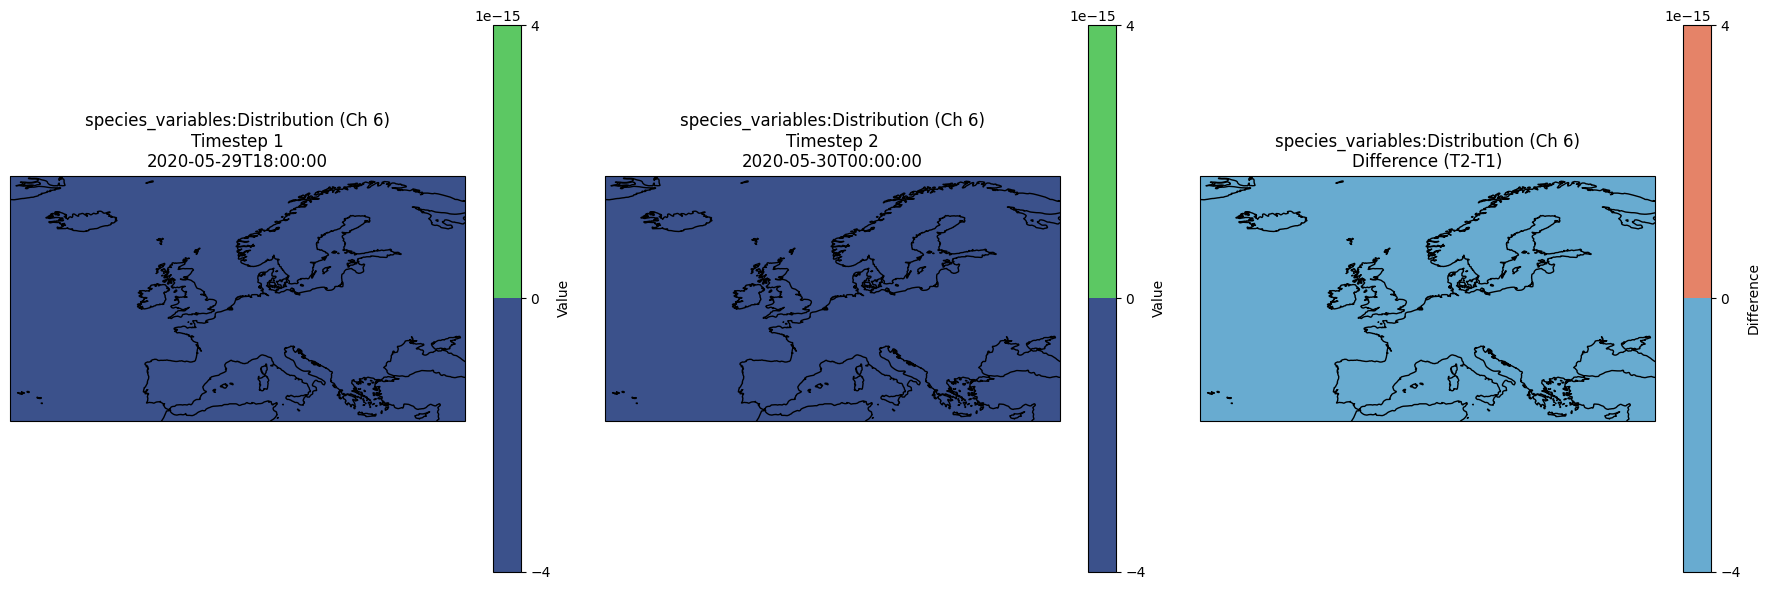

Saved plot: ./plots/species_variables:Distribution_ch6_t0_2020-05-29T18:00:00_t1_2020-05-30T00:00:00.jpeg


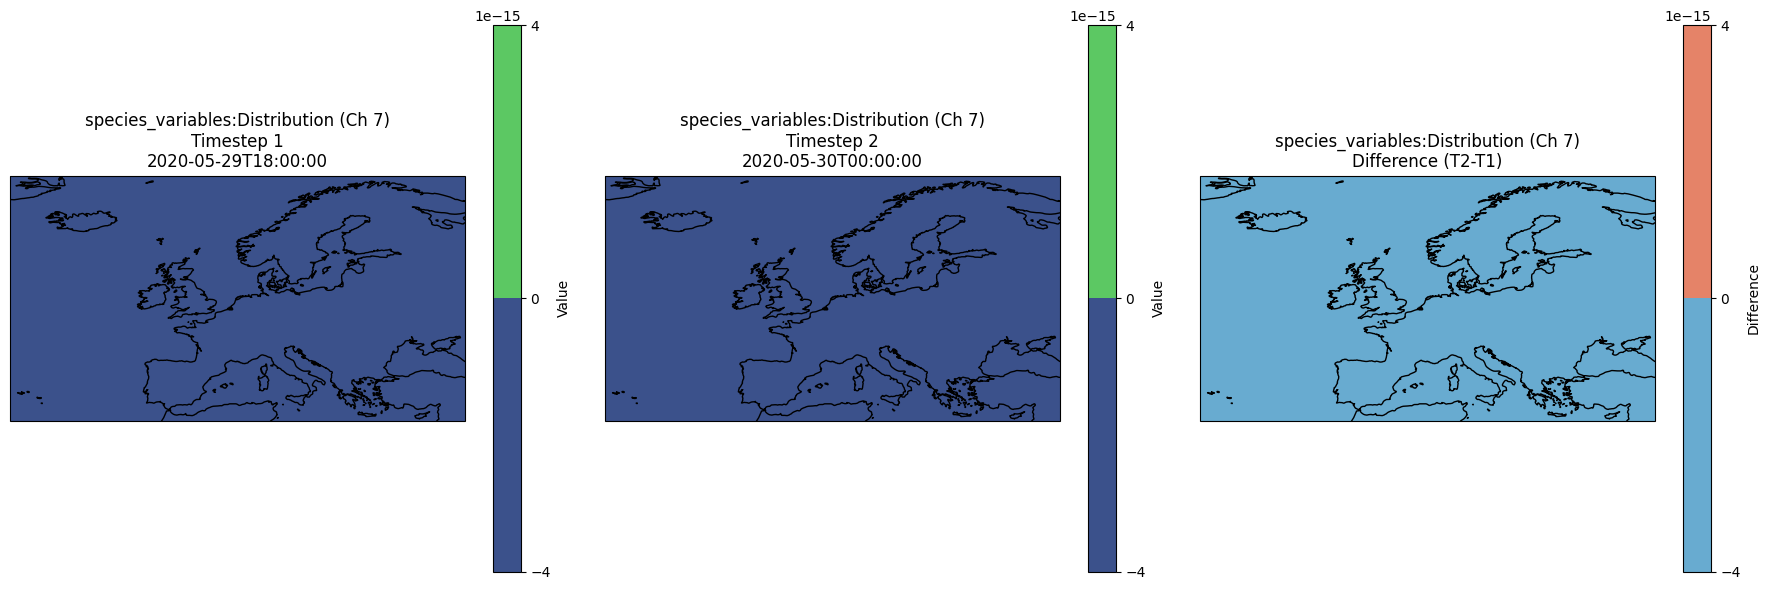

Saved plot: ./plots/species_variables:Distribution_ch7_t0_2020-05-29T18:00:00_t1_2020-05-30T00:00:00.jpeg


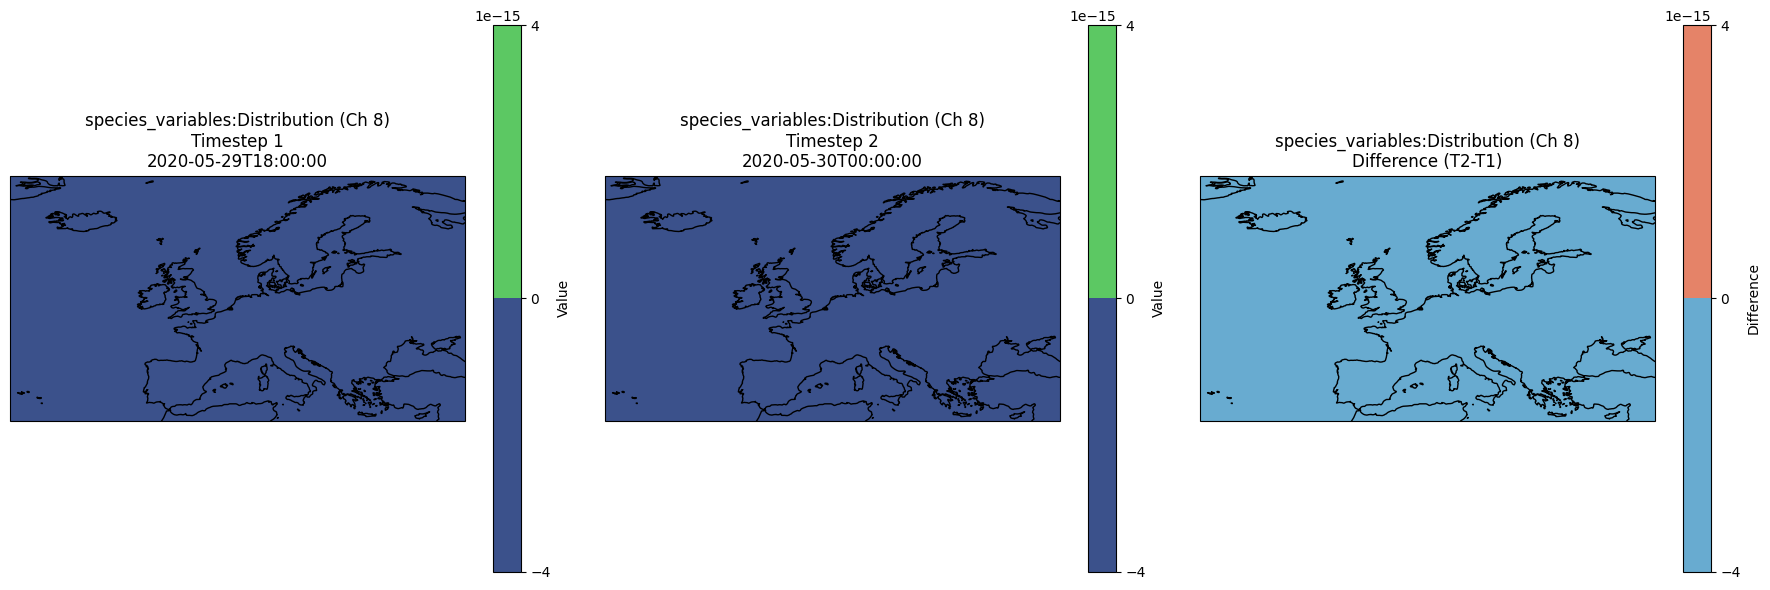

Saved plot: ./plots/species_variables:Distribution_ch8_t0_2020-05-29T18:00:00_t1_2020-05-30T00:00:00.jpeg


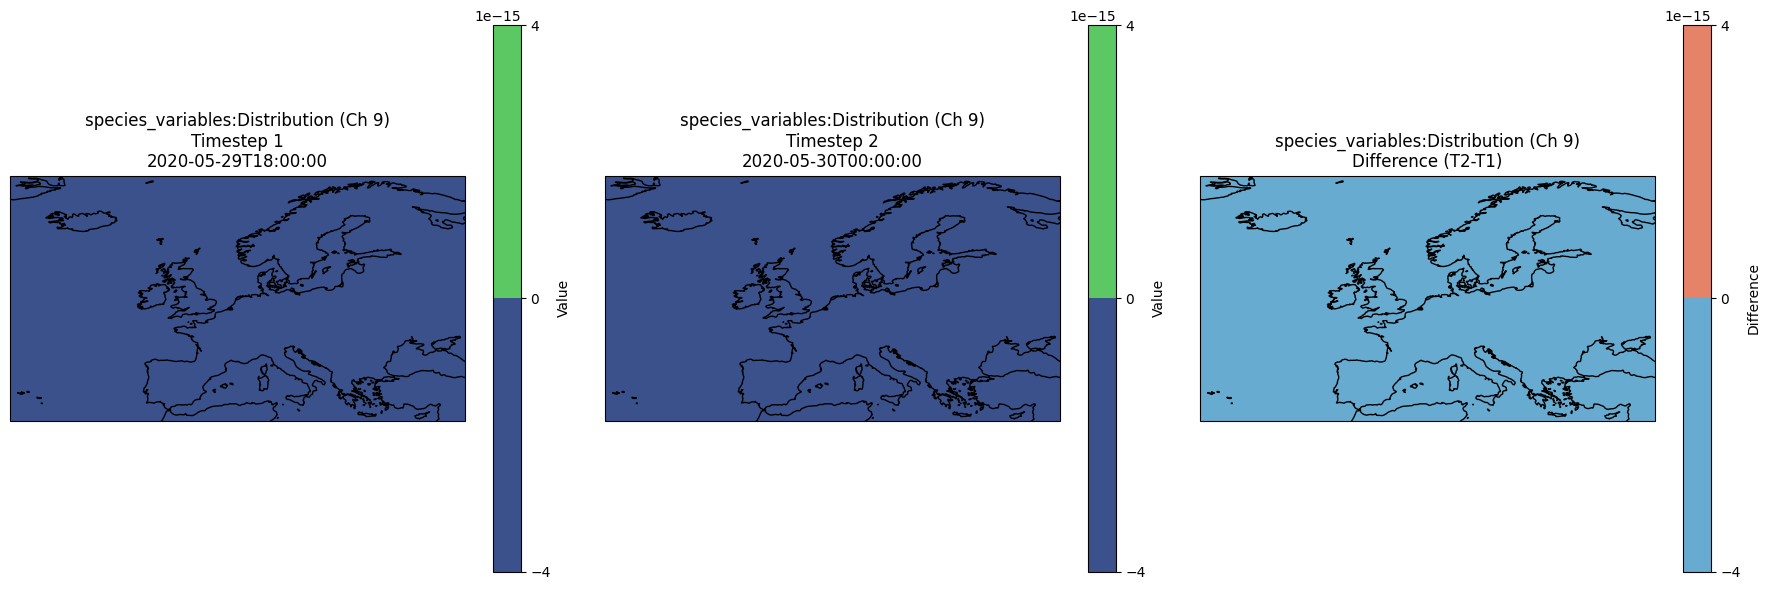

Saved plot: ./plots/species_variables:Distribution_ch9_t0_2020-05-29T18:00:00_t1_2020-05-30T00:00:00.jpeg


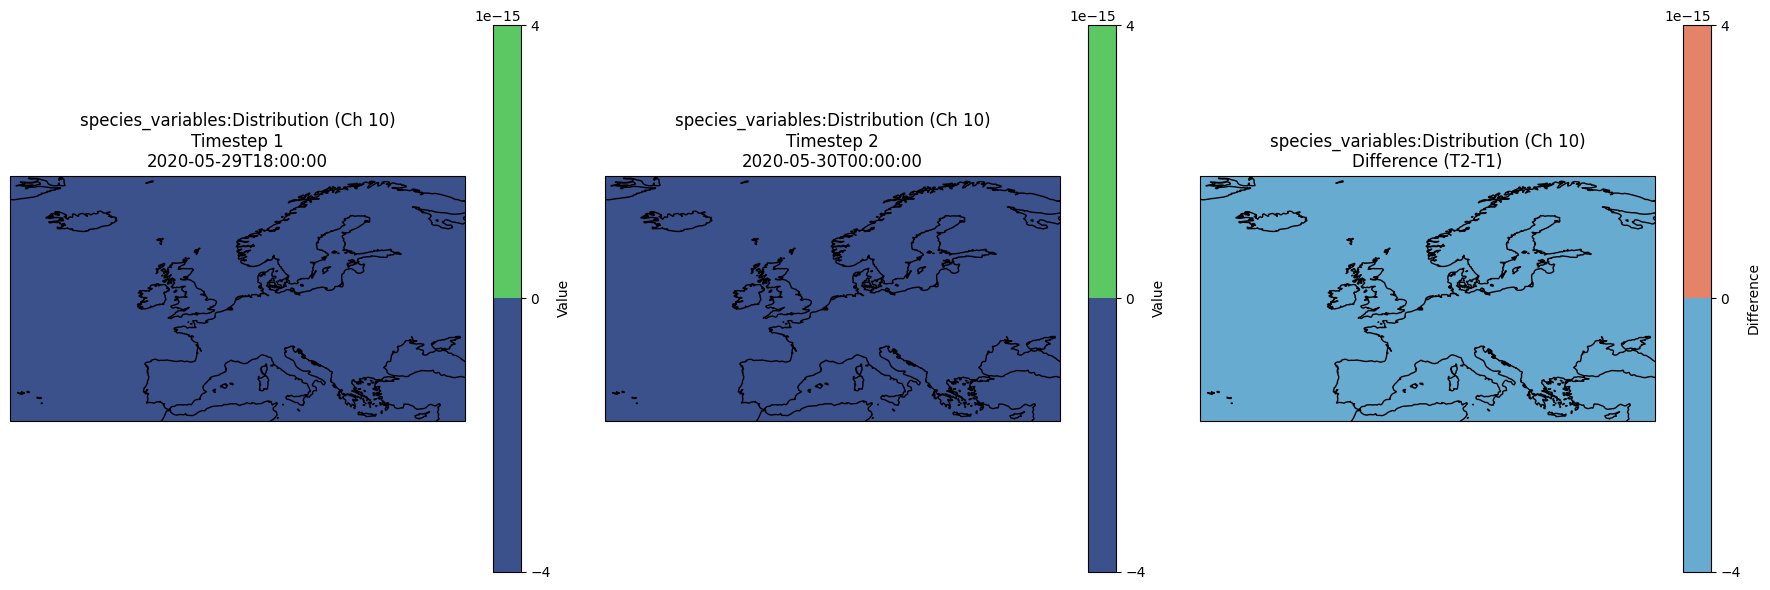

Saved plot: ./plots/species_variables:Distribution_ch10_t0_2020-05-29T18:00:00_t1_2020-05-30T00:00:00.jpeg


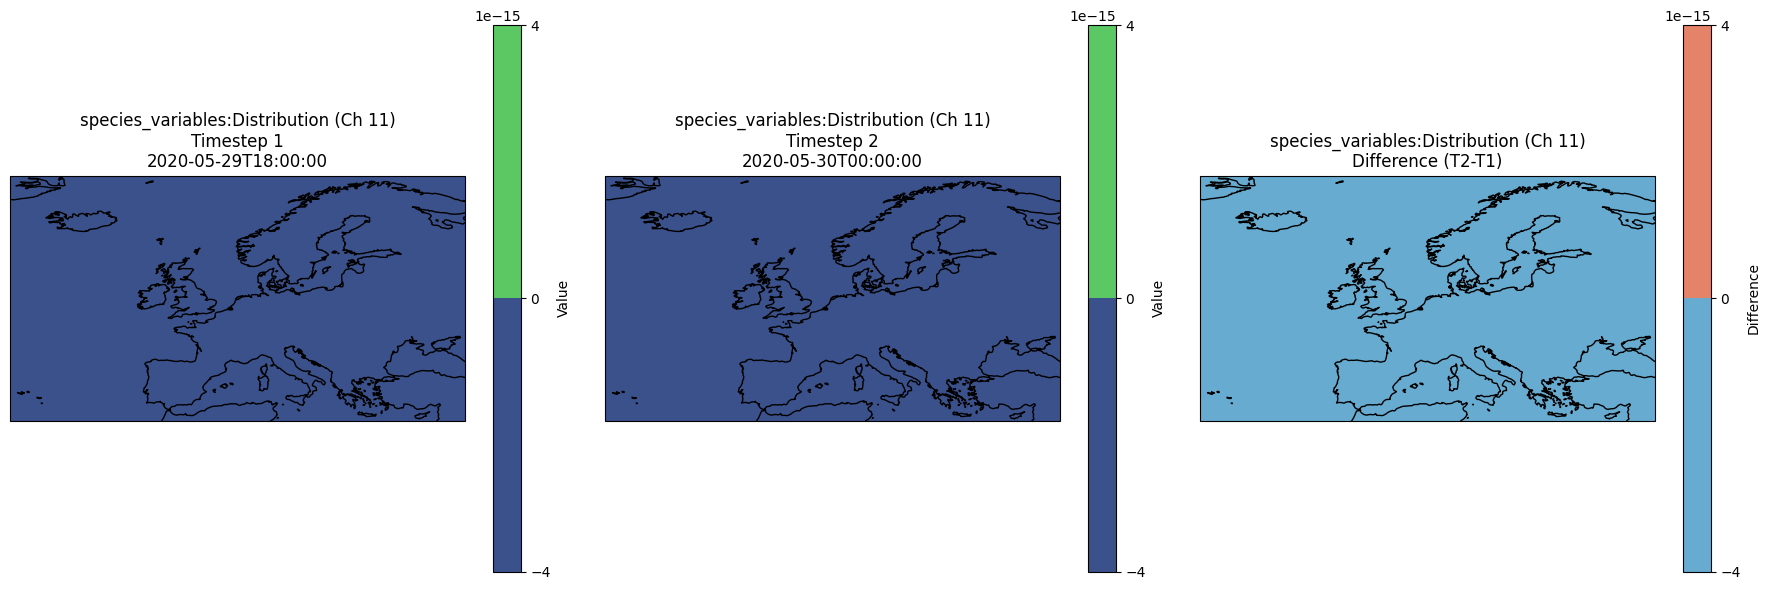

Saved plot: ./plots/species_variables:Distribution_ch11_t0_2020-05-29T18:00:00_t1_2020-05-30T00:00:00.jpeg


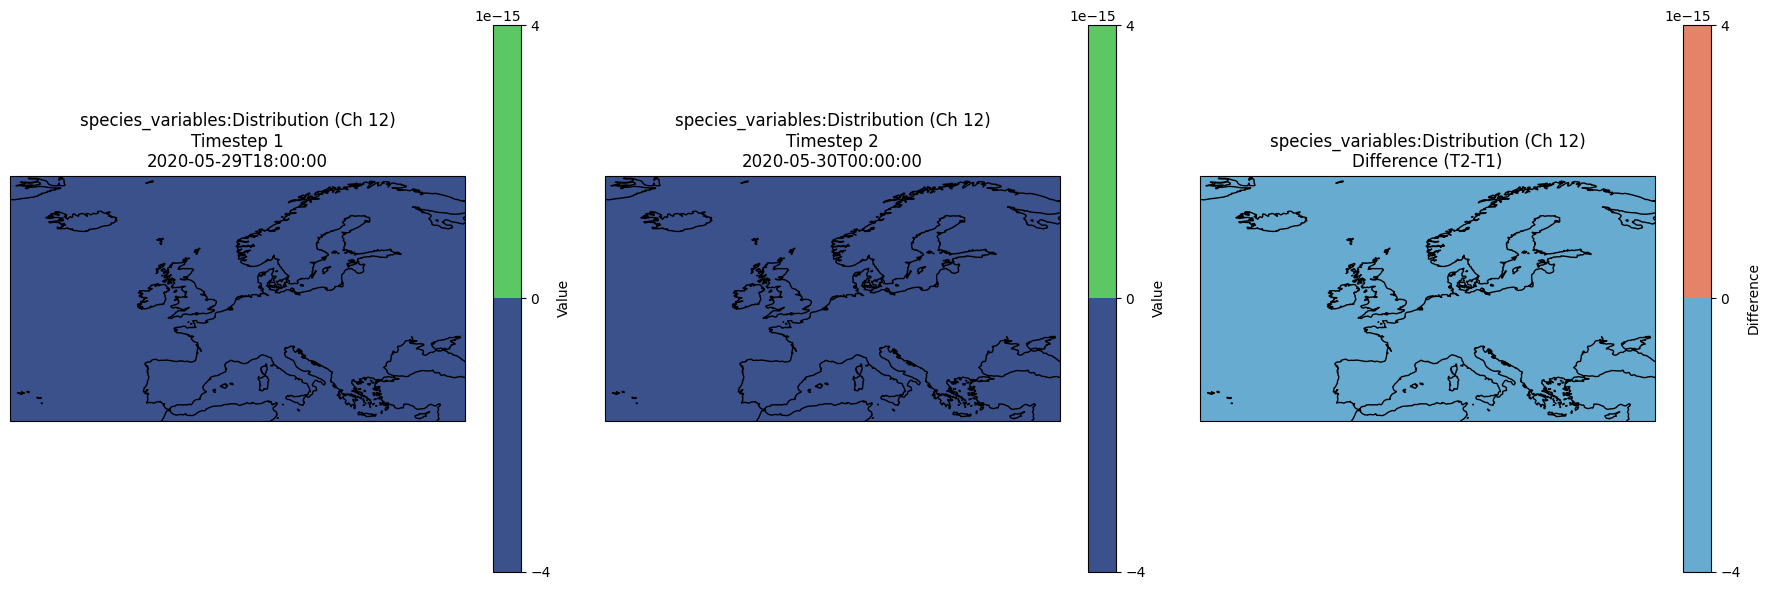

Saved plot: ./plots/species_variables:Distribution_ch12_t0_2020-05-29T18:00:00_t1_2020-05-30T00:00:00.jpeg


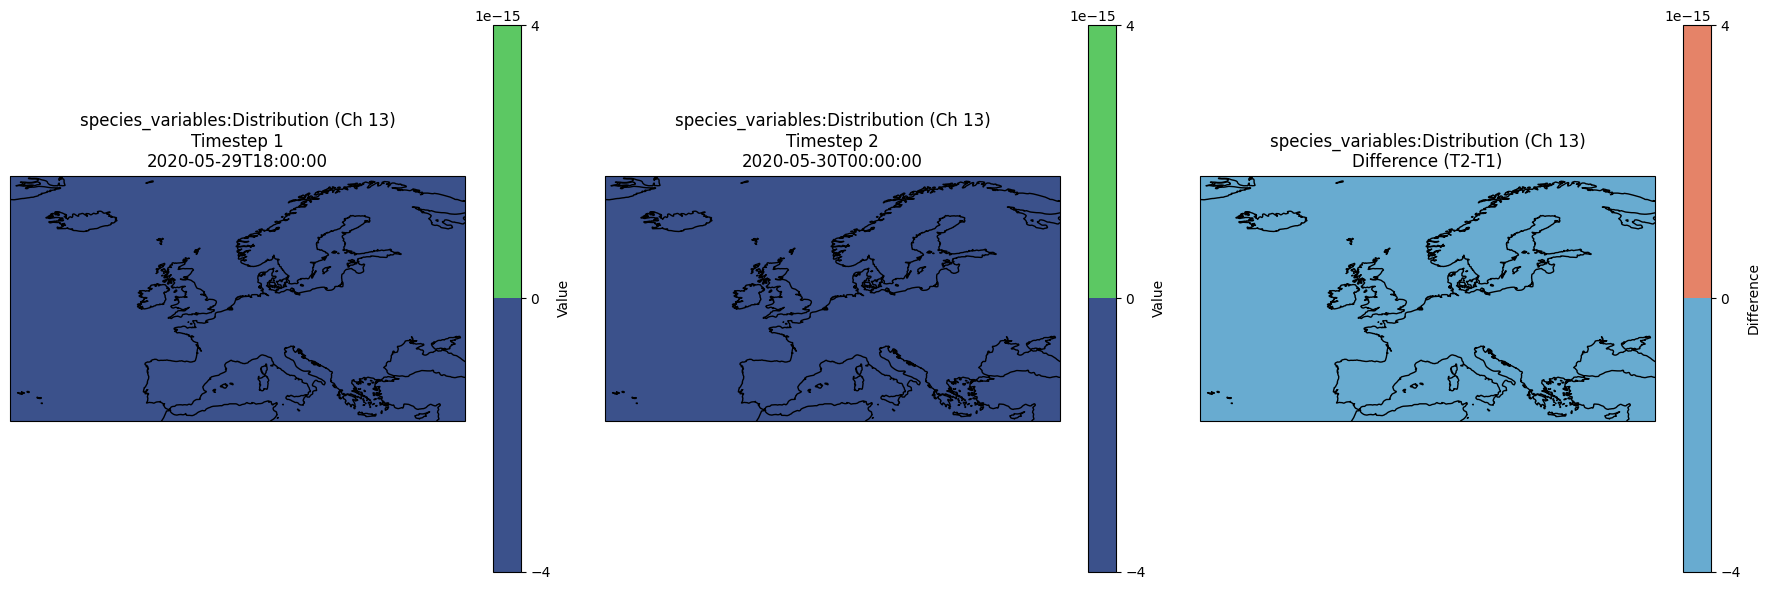

Saved plot: ./plots/species_variables:Distribution_ch13_t0_2020-05-29T18:00:00_t1_2020-05-30T00:00:00.jpeg


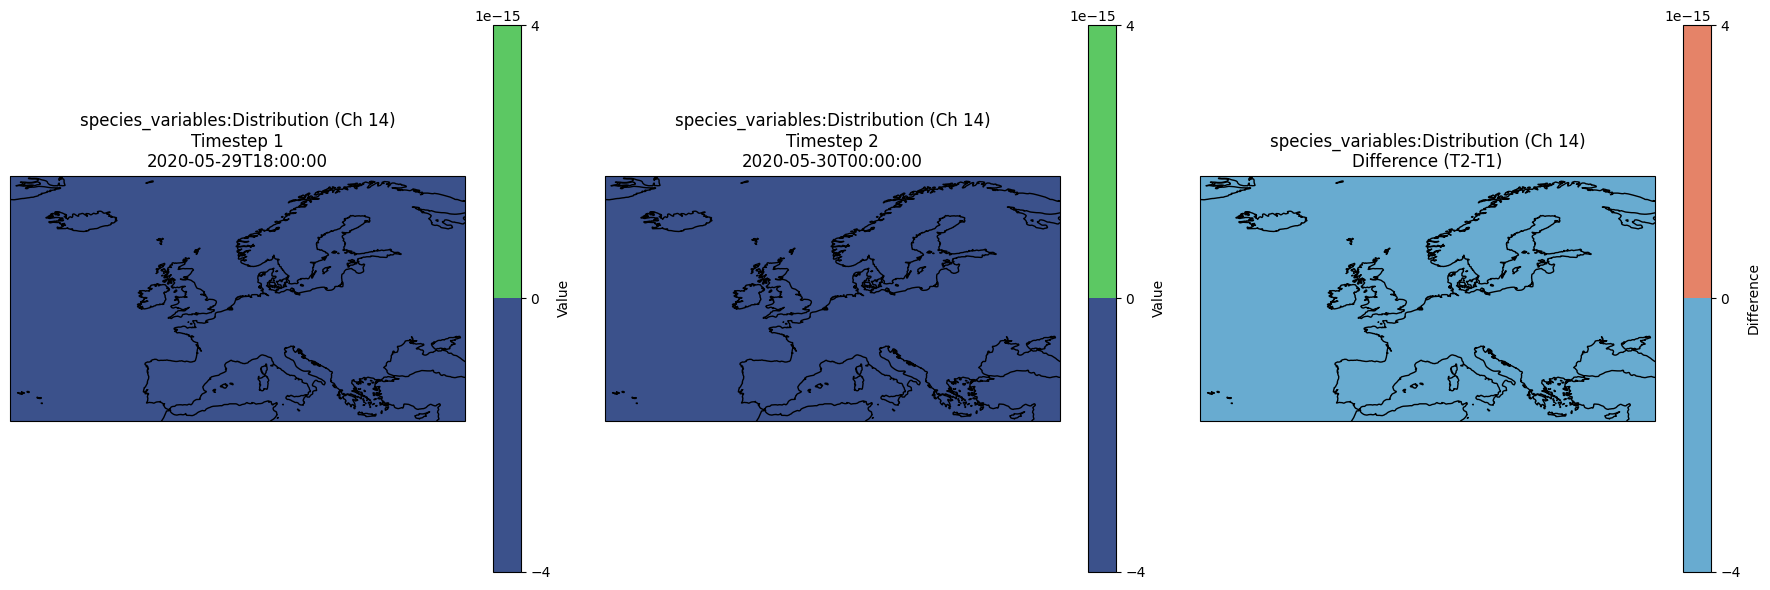

Saved plot: ./plots/species_variables:Distribution_ch14_t0_2020-05-29T18:00:00_t1_2020-05-30T00:00:00.jpeg


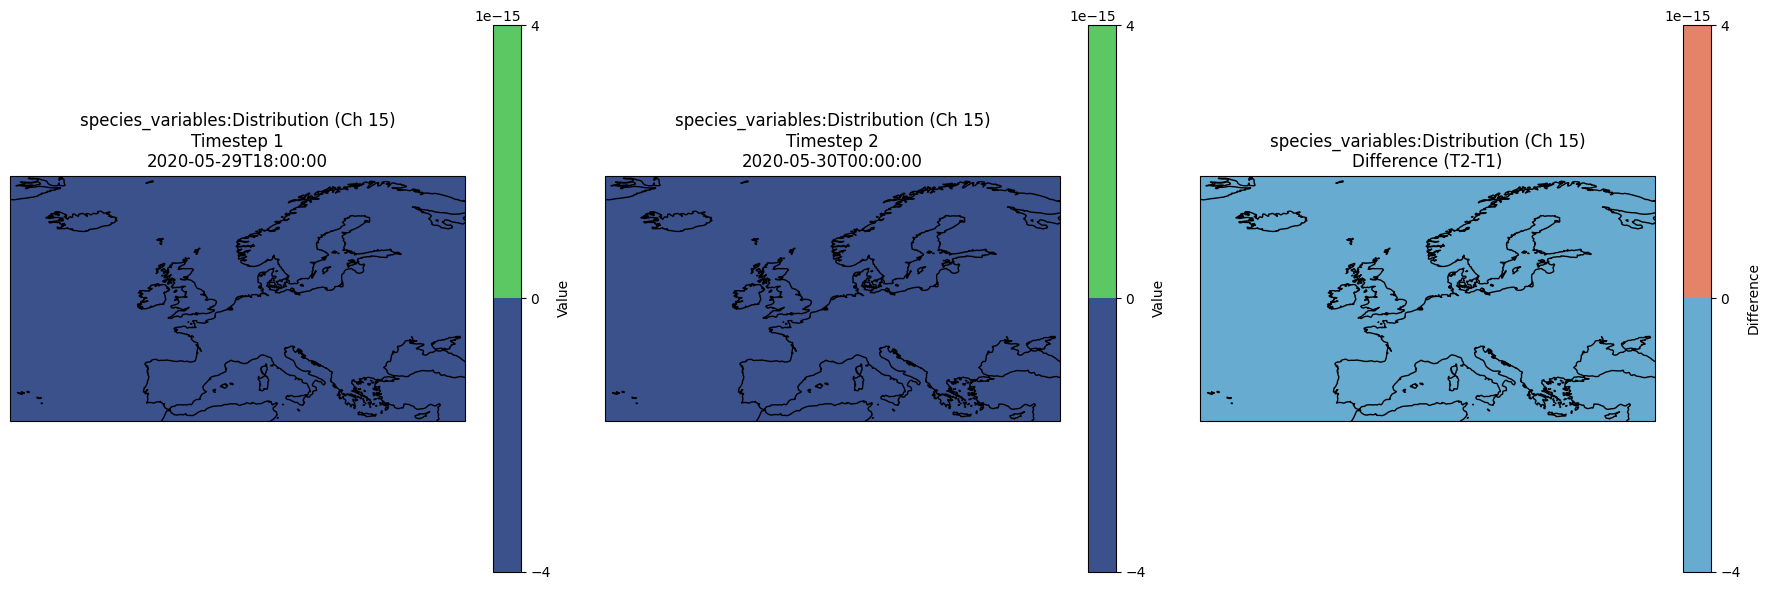

Saved plot: ./plots/species_variables:Distribution_ch15_t0_2020-05-29T18:00:00_t1_2020-05-30T00:00:00.jpeg


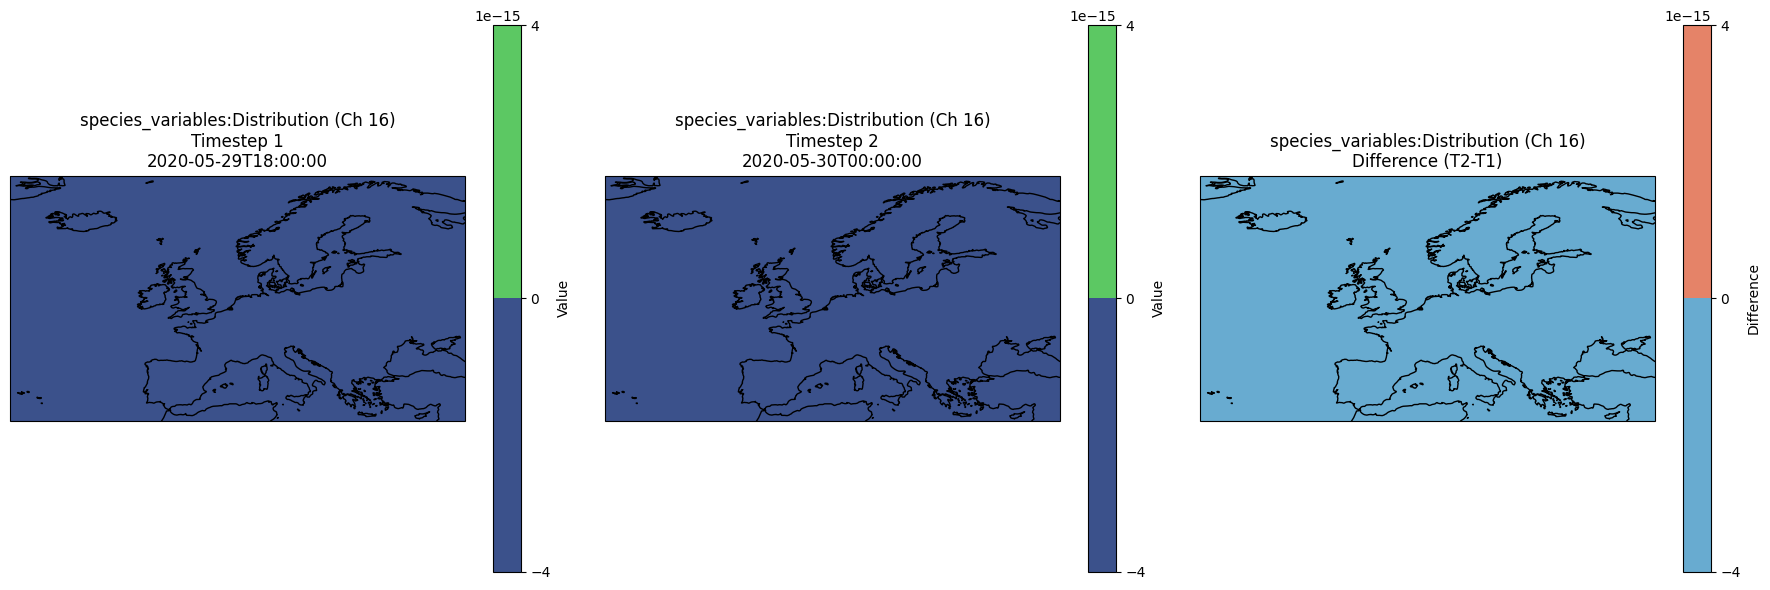

Saved plot: ./plots/species_variables:Distribution_ch16_t0_2020-05-29T18:00:00_t1_2020-05-30T00:00:00.jpeg


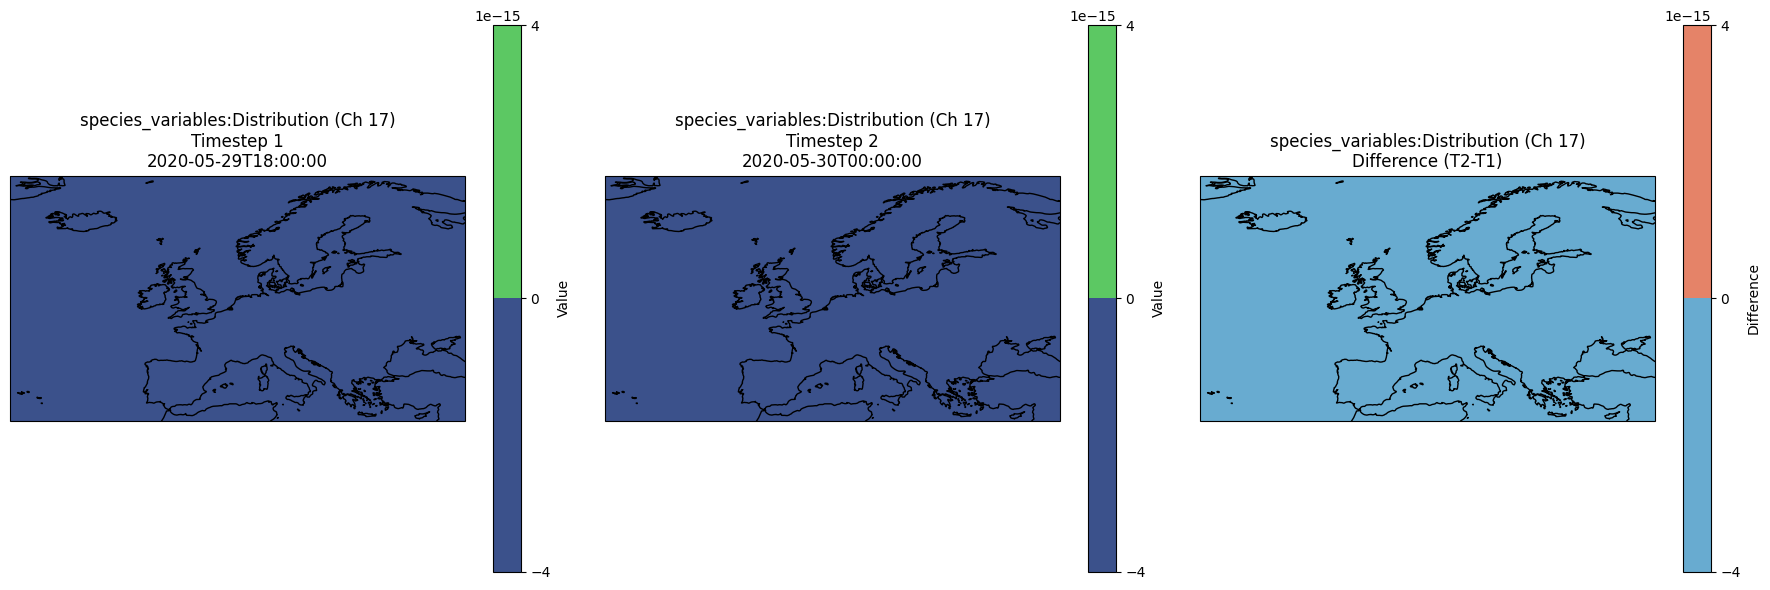

Saved plot: ./plots/species_variables:Distribution_ch17_t0_2020-05-29T18:00:00_t1_2020-05-30T00:00:00.jpeg


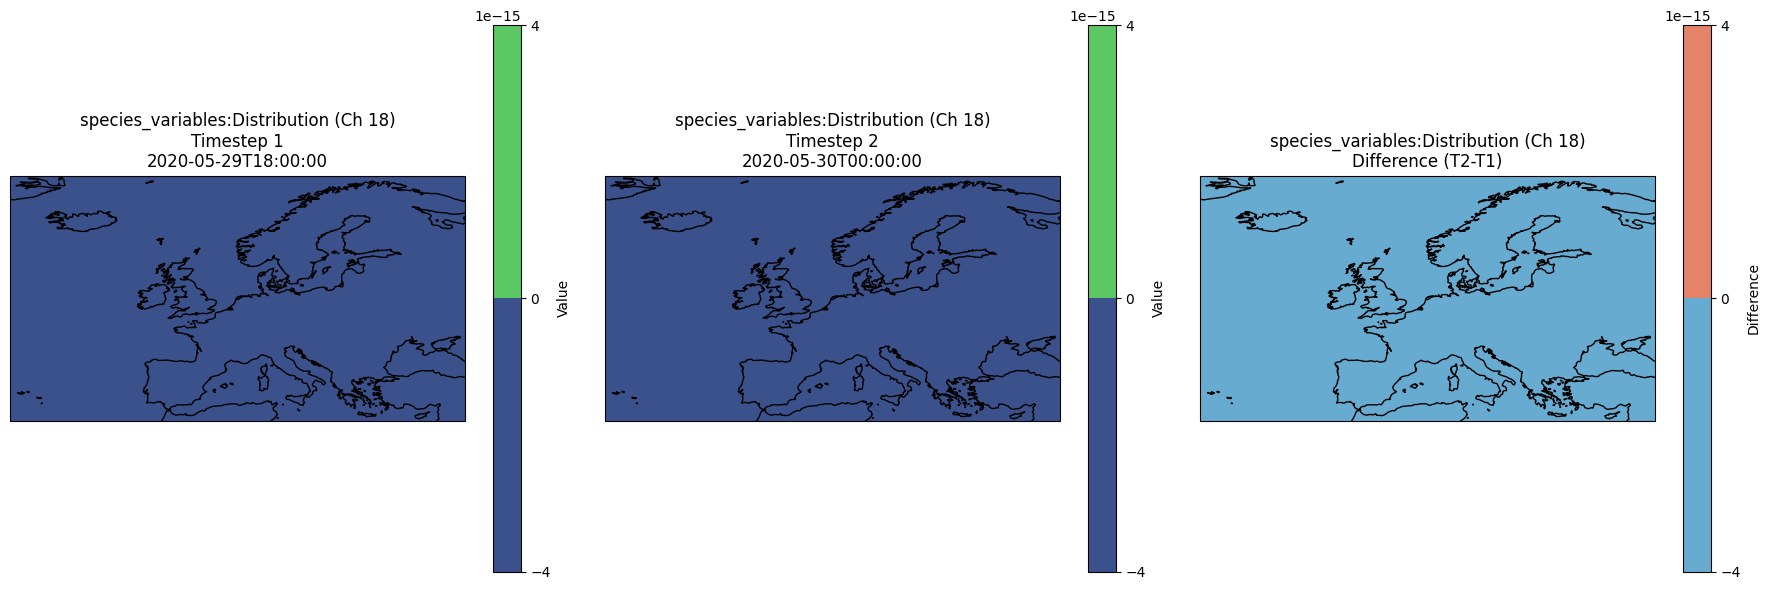

Saved plot: ./plots/species_variables:Distribution_ch18_t0_2020-05-29T18:00:00_t1_2020-05-30T00:00:00.jpeg


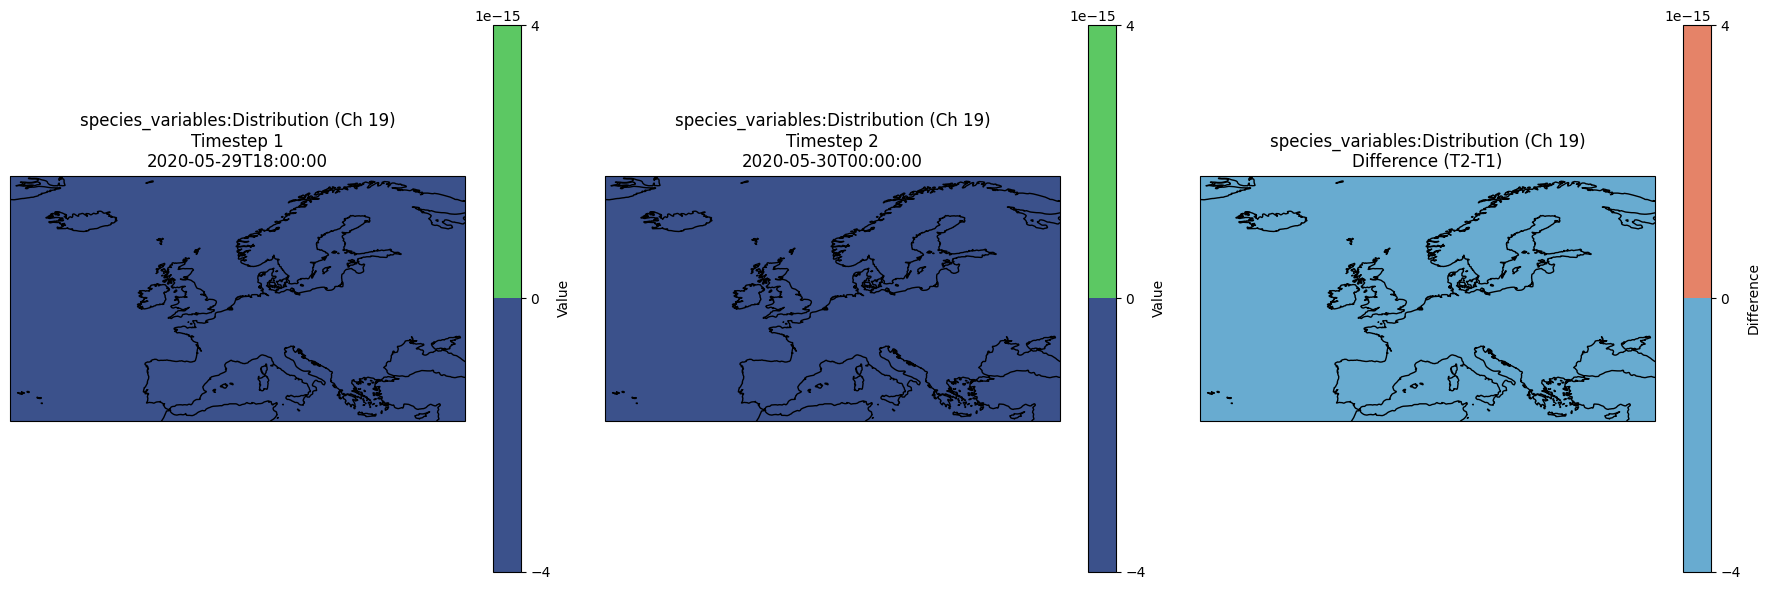

Saved plot: ./plots/species_variables:Distribution_ch19_t0_2020-05-29T18:00:00_t1_2020-05-30T00:00:00.jpeg


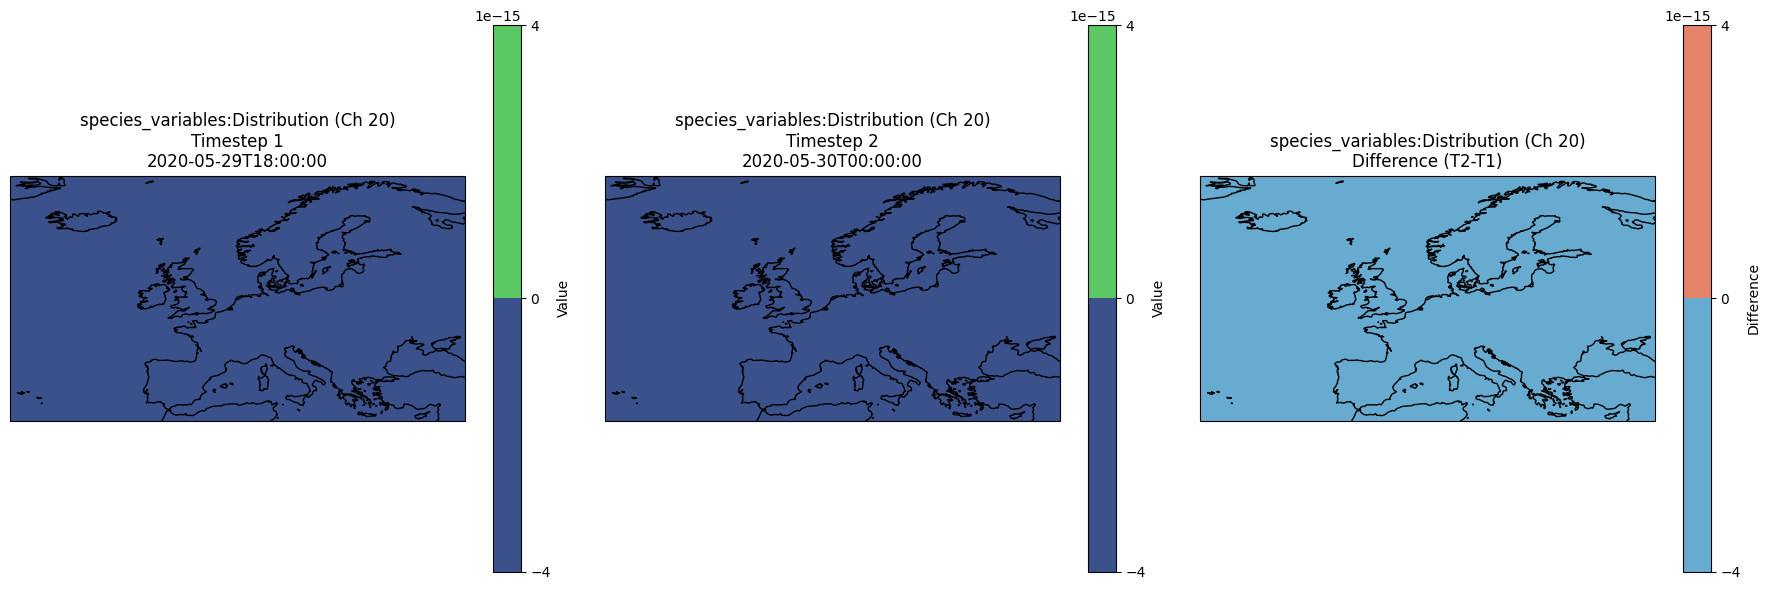

Saved plot: ./plots/species_variables:Distribution_ch20_t0_2020-05-29T18:00:00_t1_2020-05-30T00:00:00.jpeg


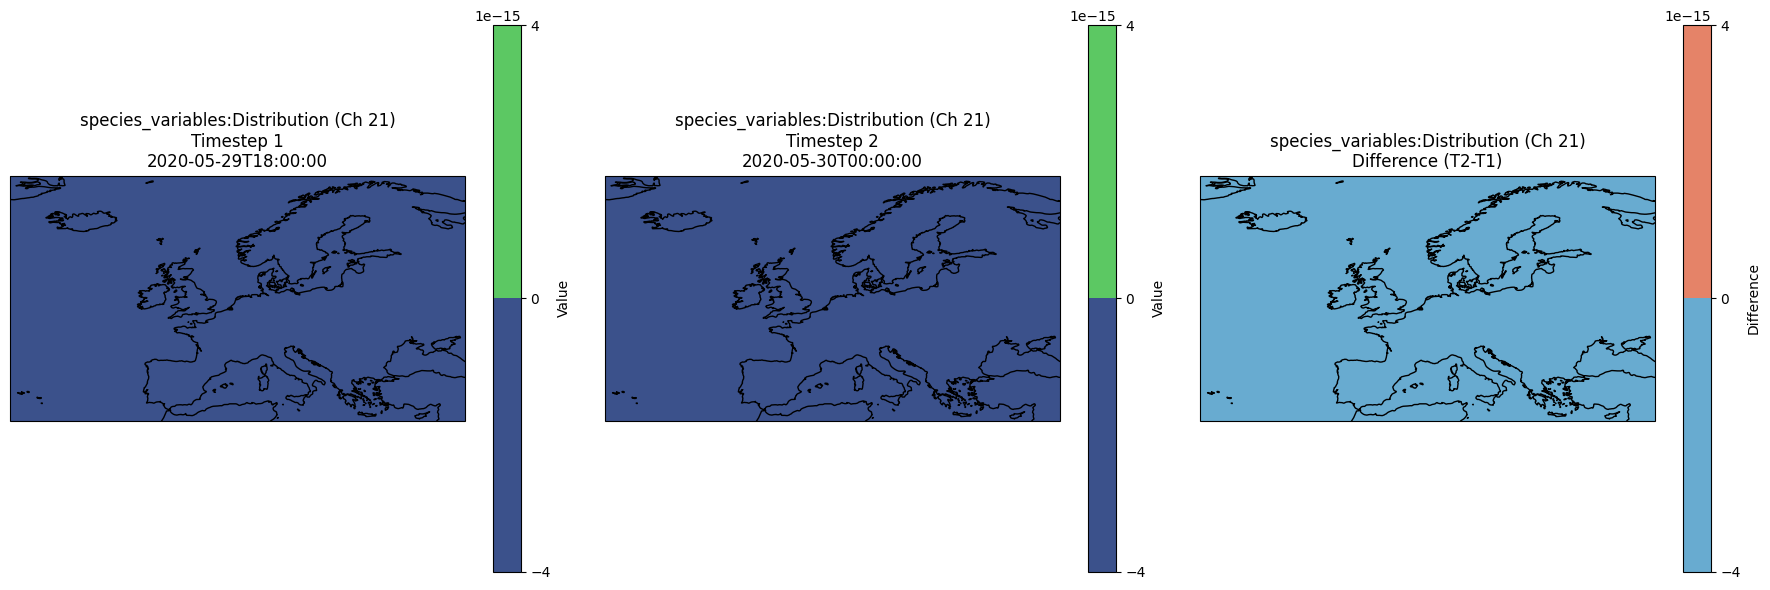

Saved plot: ./plots/species_variables:Distribution_ch21_t0_2020-05-29T18:00:00_t1_2020-05-30T00:00:00.jpeg


In [5]:

##### USAGE

# Loop over groups and plot each variable using the metadata.
for sample in viz_dataloader:
    for group_name in groups:
        true_dict = getattr(sample, group_name, {})
        for var_name, tensor in true_dict.items():
            print(f"Plotting {group_name}:{var_name} with shape {tensor.shape}")
            # Extract metadata for timestamps and pressure levels.
            metadata = sample.batch_metadata
            timestamps = metadata.timestamp
            pressure_levels = metadata.pressure_levels
            plot_europe_timesteps_and_difference(f"{group_name}:{var_name}", tensor,
                                                timestamps=timestamps,
                                                pressure_levels=pressure_levels,
                                                output_dir="./plots",
                                                plot=True,
                                                save=True)
